<a href="https://colab.research.google.com/github/JAVerduzco/Mexico-s-energy-analysis-2020/blob/main/Cap4_PML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cap 4. Análisis de PML.

#### Hecho por Alejandro Verduzco

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=42676b9a2431cb72cf092cb96fdf29987620ab5e1080a964cc9dd384426f1b9c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


Descargamos de mi github el archivo zip que contiene todos los datos de PML Zona de Carga 2020.

In [6]:
import wget
from zipfile import ZipFile

#URLs Github 
PML_PATH = "https://github.com/JAVerduzco/Mexico-s-energy-analysis-2020/raw/90bfe1fb11c3d2a7f01d8738787a127ee10bb827/BD_PML_2020.zip"

#Damos como argumento el url y descargamos los zipfiles
wget.download(PML_PATH)

file_name = 'BD_PML_2020.zip'

#Creamos un objeto ZipFile mediante el modulo ZipFile el cual le damos
#como argumento nuestro archivo zip, 'r' es un parámetro para indicar 
#que abriremos el zip en modo de lectura (read mode) y harémos referencia
#a este archivo bajo el alias 'zip' ('as zip') 
with ZipFile(file_name, 'r') as zip:
    #Extraemos todo el contenido del zip con el metodo .extractall()
    print('Extrayendo archivos...')
    zip.extractall()
    print('Finalizado')

Extrayendo archivos...
Finalizado


Usamos libreria os y funcion os.chdir para acceder a carpeta con csv. Antes cargamos la carpeta con los 24 csv.

In [7]:
import os



Accedemos a la carpeta con los csv llamada "pml_data".

In [8]:
os.chdir('BD_PML_2020')

La variable ```dirs``` contiene una lista con los nombres de archivos en la carpeta. 

In [9]:
dirs = os.listdir()

print(len(dirs))

dirs

24


['PreciosNodosDistrib SIN MDA Mes Abr02 v2020 05 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Ene01 v2020 02 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes May01 v2020 06 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes Sep02 v2020 10 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Sep01 v2020 10 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Abr01 v2020 05 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Jul01 v2020 08 03_08 00 21.csv',
 'PreciosNodosDistrib SIN MDA Mes May02 v2020 06 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes Jun01 v2020 07 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Dic01 v2021 01 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes Ago02 v2020 09 03_08 00 08.csv',
 'PreciosNodosDistrib SIN MDA Mes Jun02 v2020 07 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Jul02 v2020 08 03_08 00 21.csv',
 'PreciosNodosDistrib SIN MDA Mes Nov01 v2020 12 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes Nov02 v2020 12 03_08 00 07.c

Hay que iterar sobre la lista ```dirs```

In [ ]:
import pandas as pd
BD_PML = pd.DataFrame()

In [ ]:
for file in dirs:
  df_file = pd.read_csv(file, header=7)
  BD_PML = pd.concat([BD_PML,df_file],ignore_index=True)

In [ ]:
BD_PML

Fecha  Hora  ... Componente Congestion  ($/MWh)  Unnamed: 7
0       2020-08-16     1  ...                          -7.68         NaN
1       2020-08-16     2  ...                         -10.57         NaN
2       2020-08-16     3  ...                          -5.97         NaN
3       2020-08-16     4  ...                          -9.64         NaN
4       2020-08-16     5  ...                          -8.78         NaN
...            ...   ...  ...                            ...         ...
887179  2020-11-15    20  ...                          99.32         NaN
887180  2020-11-15    21  ...                           0.00         NaN
887181  2020-11-15    22  ...                          76.02         NaN
887182  2020-11-15    23  ...                           0.00         NaN
887183  2020-11-15    24  ...                           0.00         NaN

[887184 rows x 8 columns]

In [ ]:
len(BD_PML)

887184

In [ ]:
BD_PML.columns

Index(['Fecha', 'Hora', 'Zona de Carga', 'Precio Zonal  ($/MWh)',
       'Componente energia  ($/MWh)', 'Componente perdidas  ($/MWh)',
       'Componente Congestion  ($/MWh)', 'Unnamed: 7'],
      dtype='object')

Con drop, elimino la columna ```Unnamed: 7``` que no contien información útil.

In [ ]:
BD_PML.drop(labels='Unnamed: 7', axis=1,inplace=True)


In [ ]:
BD_PML

Fecha  ...  Componente Congestion  ($/MWh)
0       2020-08-16  ...                           -7.68
1       2020-08-16  ...                          -10.57
2       2020-08-16  ...                           -5.97
3       2020-08-16  ...                           -9.64
4       2020-08-16  ...                           -8.78
...            ...  ...                             ...
887179  2020-11-15  ...                           99.32
887180  2020-11-15  ...                            0.00
887181  2020-11-15  ...                           76.02
887182  2020-11-15  ...                            0.00
887183  2020-11-15  ...                            0.00

[887184 rows x 7 columns]

**Composición del Precio Marginal Local**

PML = COMP_ENERGIA + COMP_PERDIDAS + COMP_CONGESTION

COMP_ENERGIA: El costo implicado directamente por la 
generación de la energía. El precio en el nodo de referencia Queretaro Potencia (03QRP-400)

COMP_PERDIDAS: El costo implicado por las perdidas de energía derivados del transporte de la energía por medio de la red de transmisión (Efecto Joule)

COMP_CONGESTION: El costo implicado por las horas en que las líneas de transmisión operan en su límite máximo. Solo se presenta en aquellas horas en que este fénomeno sucede. 

In [ ]:
BD_PML.columns

Index(['Fecha', 'Hora', 'Zona de Carga', 'Precio Zonal  ($/MWh)',
       'Componente energia  ($/MWh)', 'Componente perdidas  ($/MWh)',
       'Componente Congestion  ($/MWh)'],
      dtype='object')

In [ ]:
BD_PML.rename(columns = {'Precio Zonal  ($/MWh)':'PML',
                         'Componente energia  ($/MWh)':'Comp_energía',
                         'Componente perdidas  ($/MWh)':'Comp_perd',
                         'Componente Congestion  ($/MWh)':'Comp_cong',
                          'Zona de Carga':'Zona'},inplace=True)
BD_PML['Fecha']= pd.to_datetime(BD_PML['Fecha'])
BD_PML.sort_values(by=['Fecha','Hora'],inplace=True)

In [ ]:
BD_PML

Fecha  Hora            Zona  ...  Comp_energía  Comp_perd  Comp_cong
189072 2020-01-01     1        ACAPULCO  ...        363.82      41.40       0.00
189096 2020-01-01     1  AGUASCALIENTES  ...        363.82      -5.59       0.00
189120 2020-01-01     1      APATZINGAN  ...        363.82       8.69       0.00
189144 2020-01-01     1         CABORCA  ...        363.82     -81.67     -68.78
189168 2020-01-01     1         CAMARGO  ...        363.82     -56.42       0.00
...           ...   ...             ...  ...           ...        ...        ...
113831 2020-12-31    24          ZACAPU  ...        461.50       6.90       0.00
113855 2020-12-31    24       ZACATECAS  ...        461.50      -5.91       0.00
113879 2020-12-31    24          ZAMORA  ...        461.50       5.88       0.00
113903 2020-12-31    24        ZAPOTLAN  ...        461.50      -4.13       0.00
113927 2020-12-31    24     ZIHUATANEJO  ...        461.50      24.57       0.00

[887184 rows x 7 columns]

Aplicamos dentro de nuestro ```.groupby()``` la función ```.mean()``` para obtener el Precio promedio diario dado en **(MXN/MWh)** 


![picture](https://miro.medium.com/max/945/0*Nu8unmGXa3n1cAGY.png)

In [ ]:
PML_diario = BD_PML.groupby(['Fecha','Zona'])['PML'].mean().reset_index()


In [ ]:
#en este df se tiene el promedio diario de cada zona, antes teniamos el precionde las 24 horas de cada dia
PML_diario

Fecha            Zona         PML
0     2020-01-01        ACAPULCO  436.570833
1     2020-01-01  AGUASCALIENTES  314.476667
2     2020-01-01      APATZINGAN  341.145000
3     2020-01-01         CABORCA  203.472917
4     2020-01-01         CAMARGO  273.548750
...          ...             ...         ...
36961 2020-12-31          ZACAPU  449.835833
36962 2020-12-31       ZACATECAS  434.239167
36963 2020-12-31          ZAMORA  449.855833
36964 2020-12-31        ZAPOTLAN  440.121250
36965 2020-12-31     ZIHUATANEJO  467.425000

[36966 rows x 3 columns]

Para crear una gráfica del PML de cada zona de carga creamos una lista con las zonas de carga para iterar sobre ella.

In [ ]:
Zonas = PML_diario['Zona'].unique()
Zonas

array(['ACAPULCO', 'AGUASCALIENTES', 'APATZINGAN', 'CABORCA', 'CAMARGO',
       'CAMPECHE', 'CANCUN', 'CARMEN', 'CASAS GRANDES', 'CELAYA',
       'CENTRO ORIENTE', 'CENTRO SUR', 'CHETUMAL', 'CHIHUAHUA',
       'CHILPANCINGO', 'CHONTALPA', 'CIENEGA', 'COATZACOALCOS', 'COLIMA',
       'CORDOBA', 'CUAUHTEMOC', 'CUAUTLA', 'CUERNAVACA', 'CULIACAN',
       'DURANGO', 'FRESNILLO', 'GUADALAJARA', 'GUASAVE', 'GUAYMAS',
       'HERMOSILLO', 'HUAJUAPAN', 'HUASTECA', 'HUATULCO', 'HUEJUTLA',
       'IGUALA', 'IRAPUATO', 'IXMIQUILPAN', 'IZUCAR', 'JIQUILPAN',
       'JUAREZ', 'LAGUNA', 'LAZARO CARDENAS', 'LEON', 'LOS ALTOS',
       'LOS MOCHIS', 'LOS RIOS', 'LOS TUXTLAS', 'MANZANILLO', 'MATAMOROS',
       'MATEHUALA', 'MAZATLAN', 'MERIDA', 'MINAS', 'MONCLOVA',
       'MONTEMORELOS', 'MONTERREY', 'MORELIA', 'MORELOS', 'MOTUL TIZIMIN',
       'NAVOJOA', 'NOGALES', 'NUEVO LAREDO', 'OAXACA', 'OBREGON',
       'ORIZABA', 'PIEDRAS NEGRAS', 'POZA RICA', 'PUEBLA', 'QUERETARO',
       'REYNOSA', 'RIVIERA MAYA

```.pyplot``` es un módulo de la librería ```matplotlib```, y es quien nos ayudará específicamente a realizar nuestras gráficas

In [ ]:
import matplotlib.pyplot as plt

En cada iteración obtengo un subdataframe llamado ```plot_data``` del dataframe ```PML_diario[]```, este subdataframe lo utilizaremos para graficar con la librería de matplotlib. En la función ```plt.plot()``` proveemos de argumento la columna ```plot_data['Fecha']```como eje x y la columna ```plot_data['PML']``` como eje y. 

In [ ]:
i=0
prueba =PML_diario[PML_diario['Zona']==Zonas[i]]
prueba

Fecha      Zona         PML
0     2020-01-01  ACAPULCO  436.570833
101   2020-01-02  ACAPULCO  610.293750
202   2020-01-03  ACAPULCO  735.700833
303   2020-01-04  ACAPULCO  472.028750
404   2020-01-05  ACAPULCO  347.766250
...          ...       ...         ...
36461 2020-12-27  ACAPULCO  555.680417
36562 2020-12-28  ACAPULCO  598.448750
36663 2020-12-29  ACAPULCO  515.933750
36764 2020-12-30  ACAPULCO  562.299167
36865 2020-12-31  ACAPULCO  486.186667

[366 rows x 3 columns]

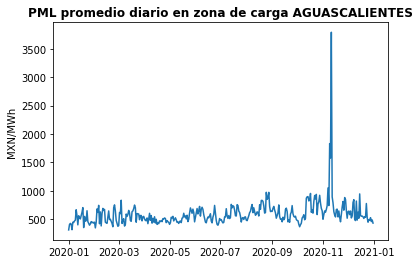

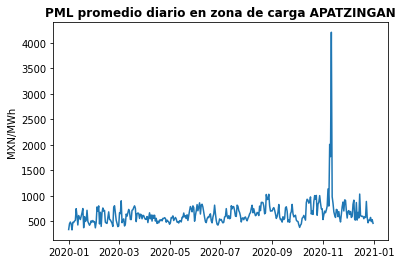

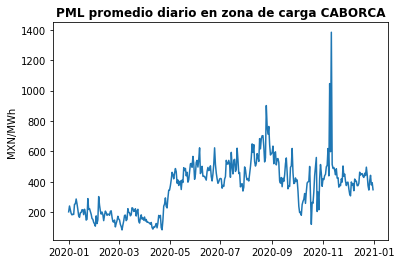

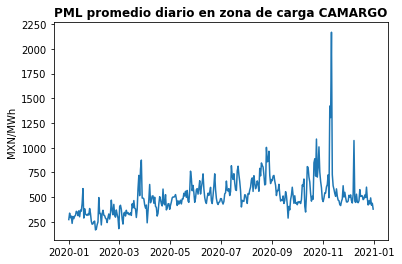

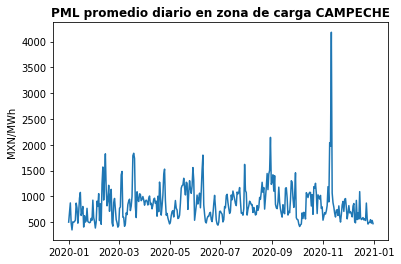

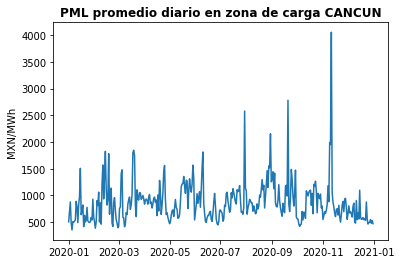

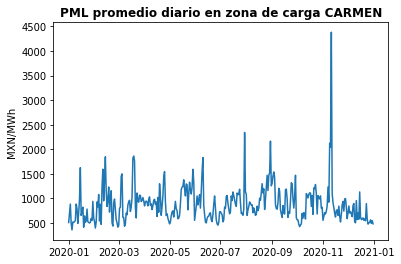

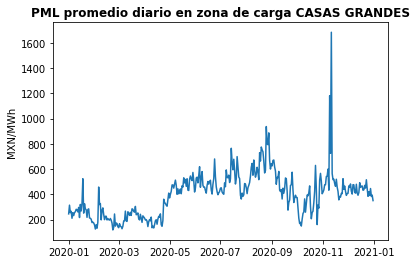

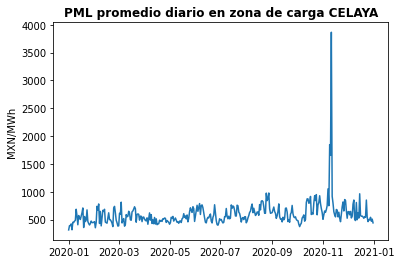

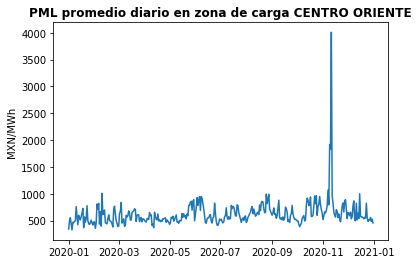

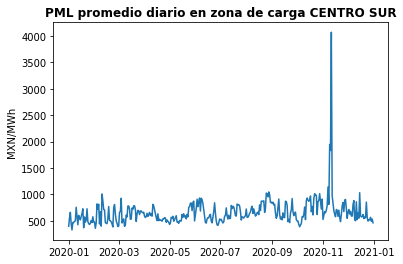

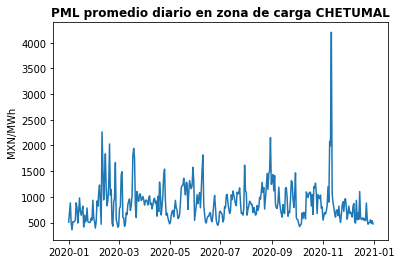

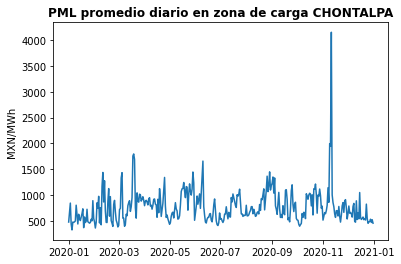

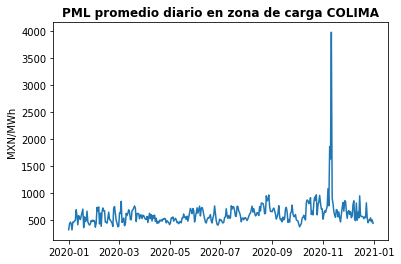

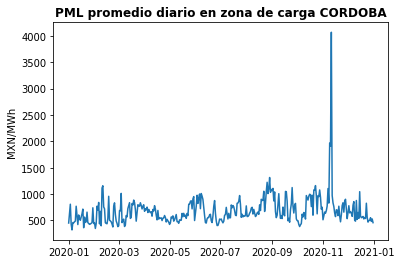

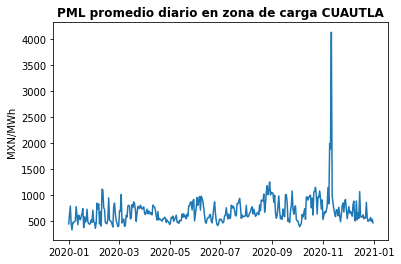

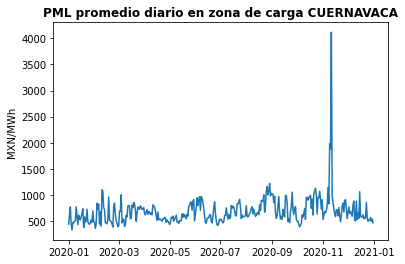

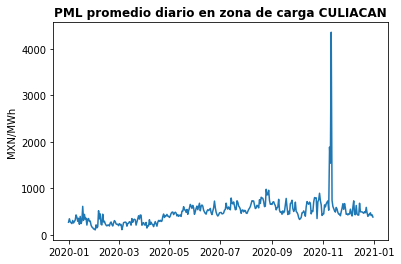

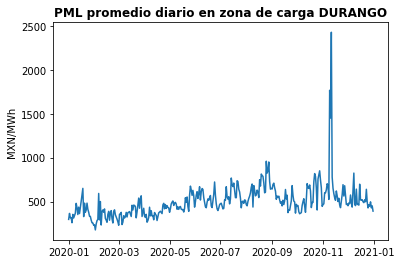

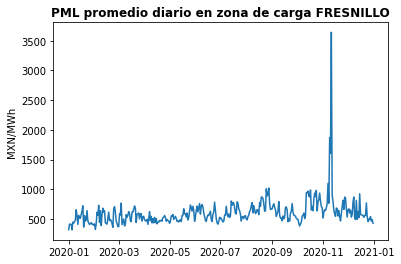

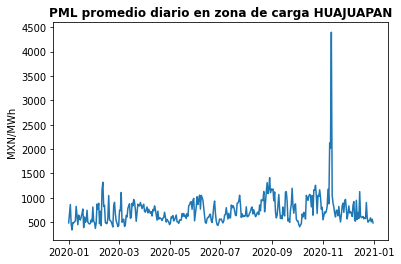

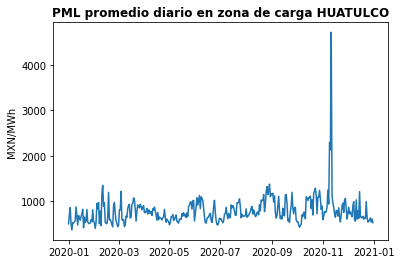

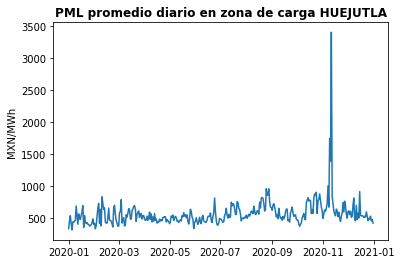

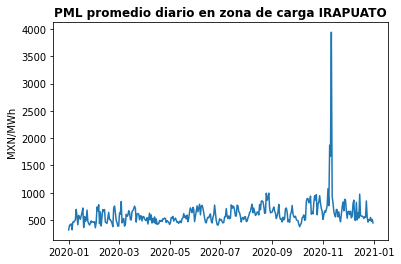

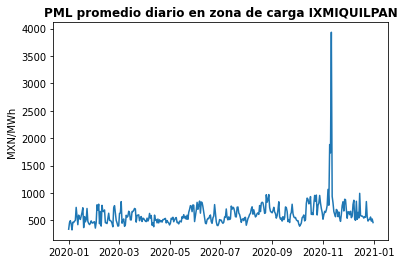

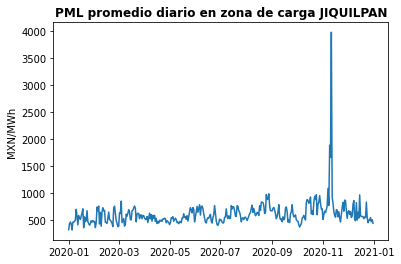

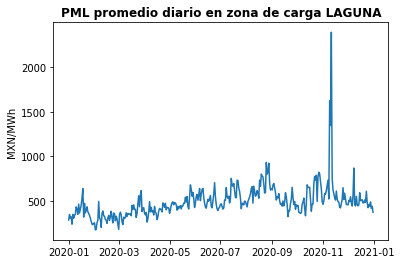

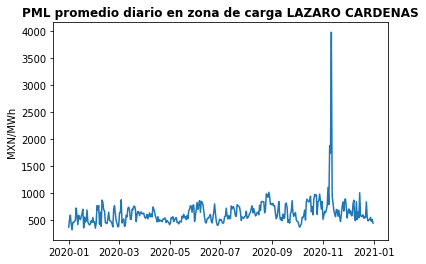

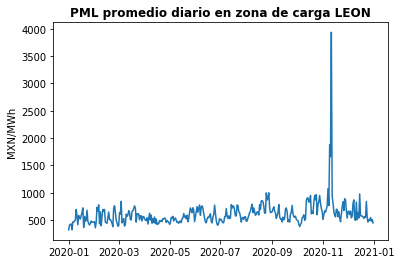

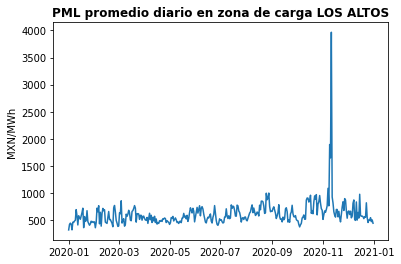

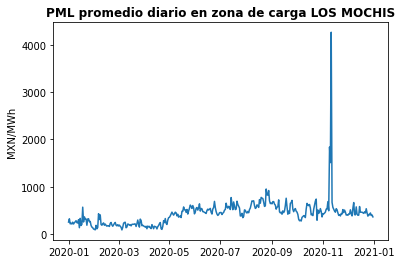

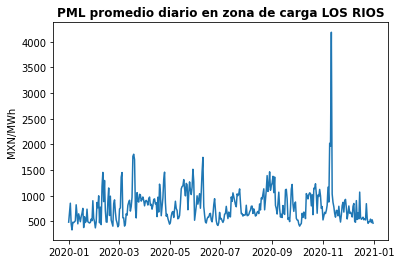

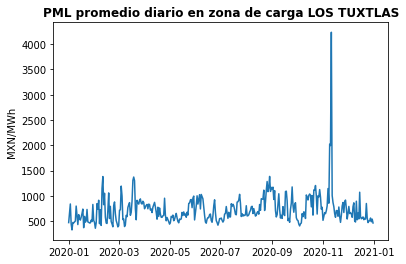

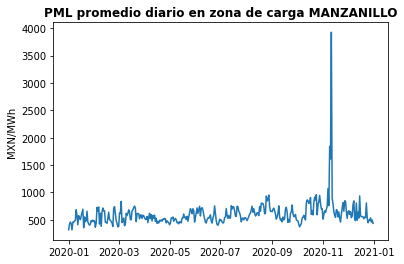

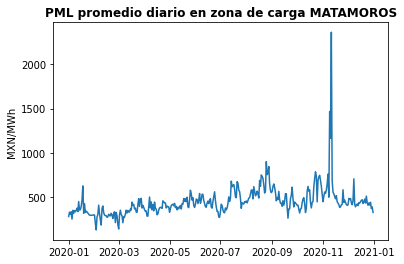

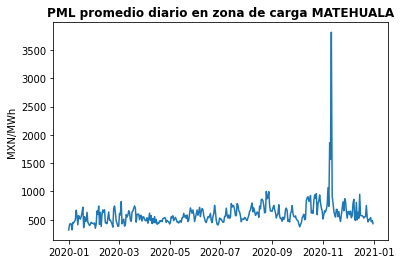

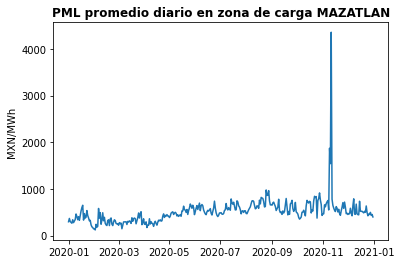

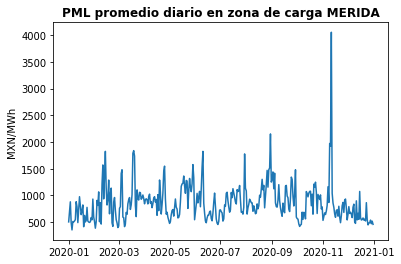

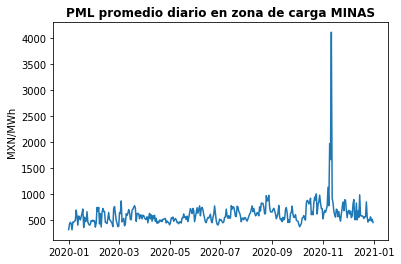

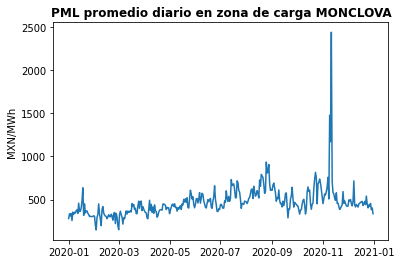

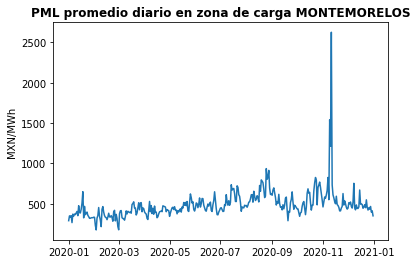

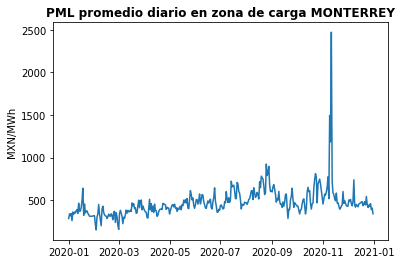

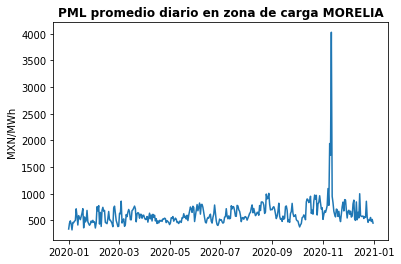

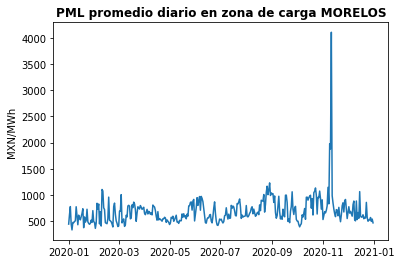

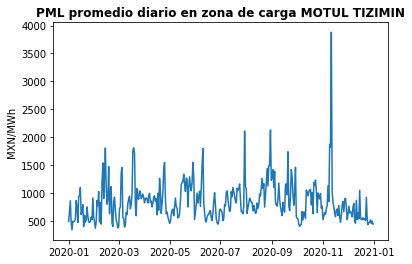

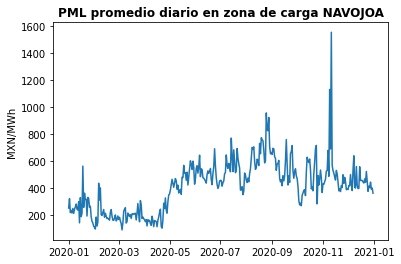

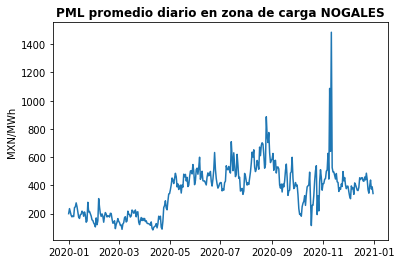

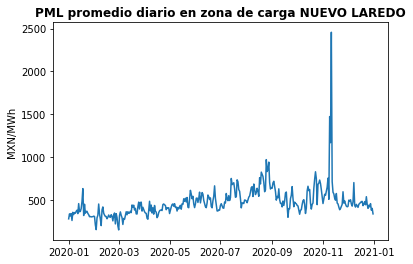

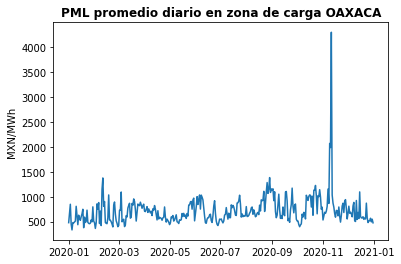

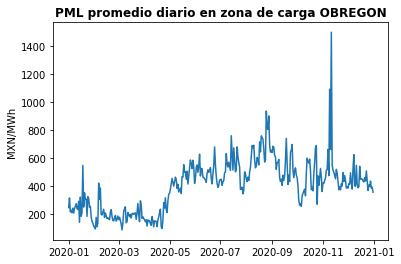

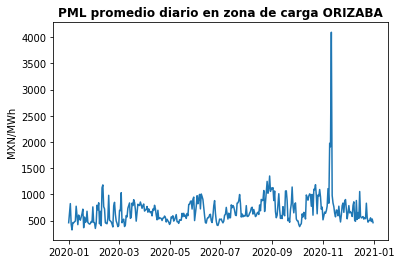

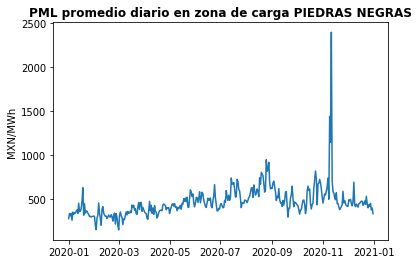

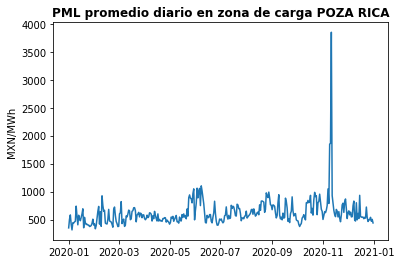

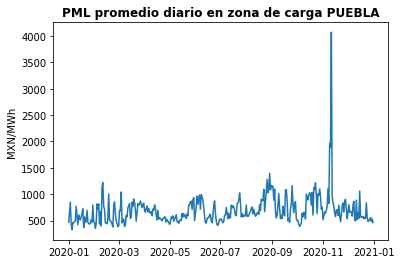

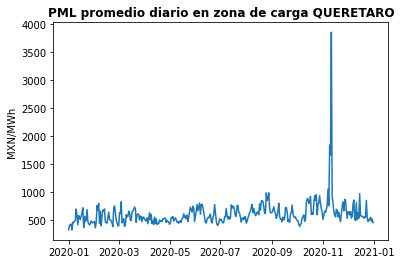

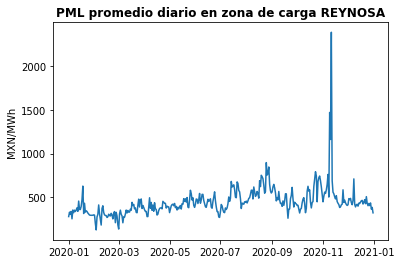

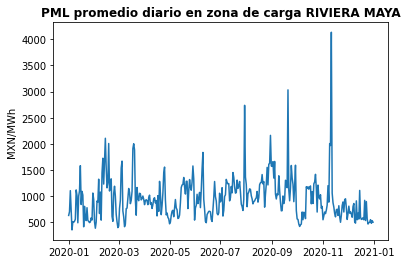

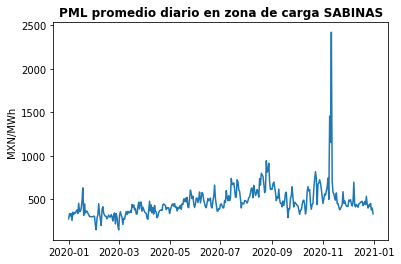

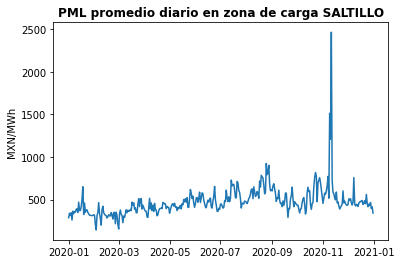

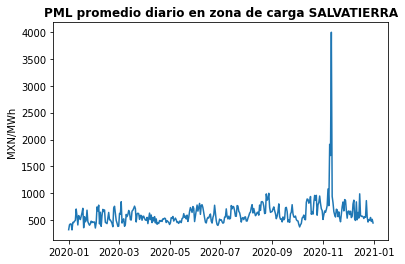

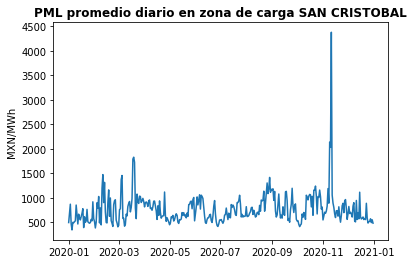

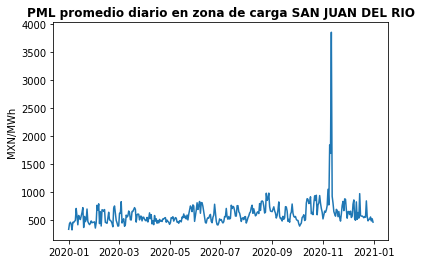

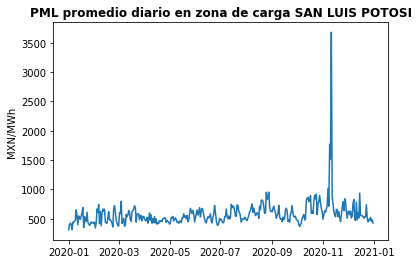

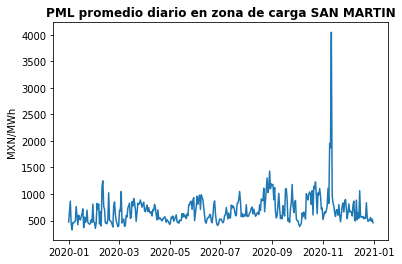

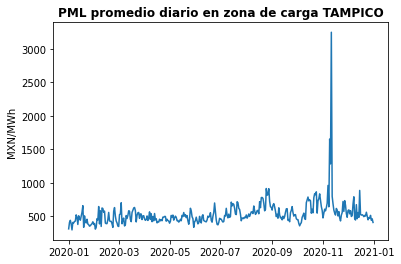

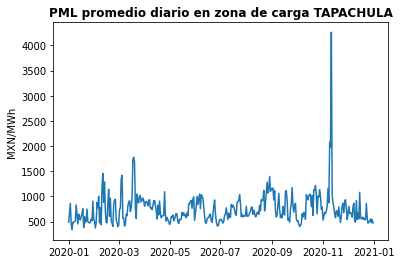

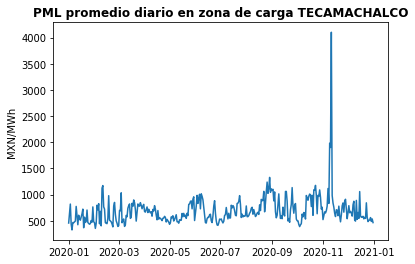

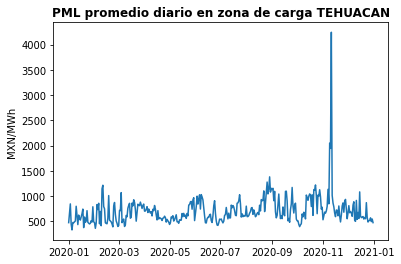

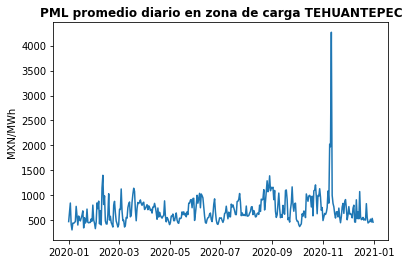

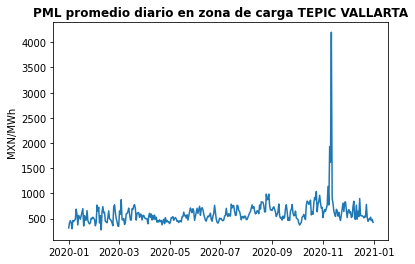

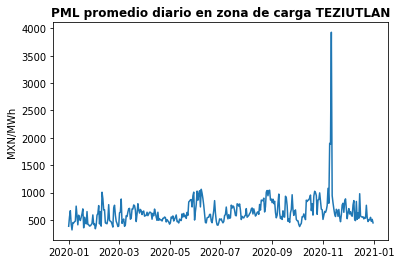

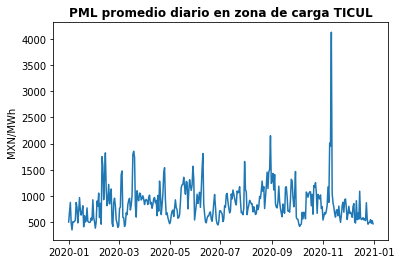

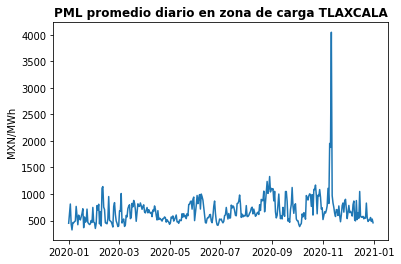

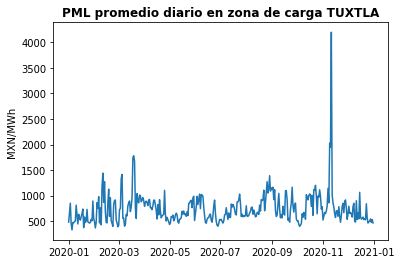

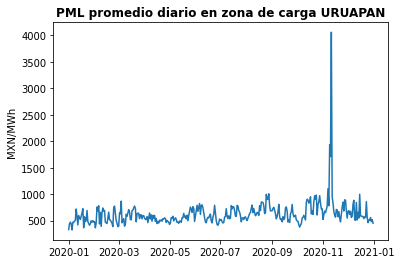

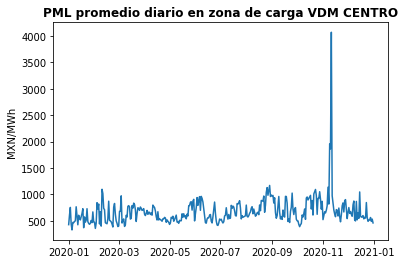

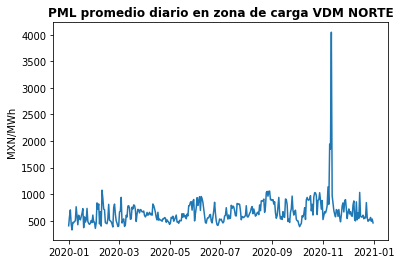

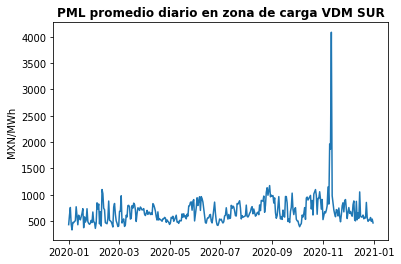

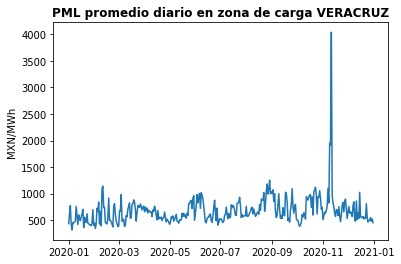

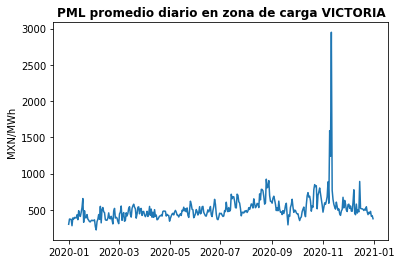

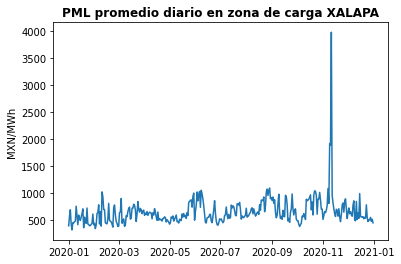

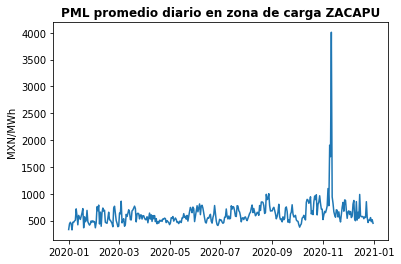

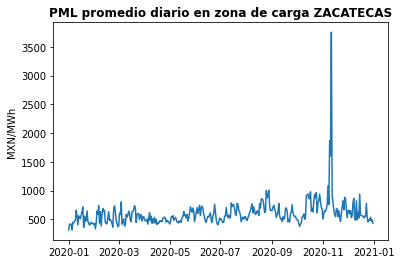

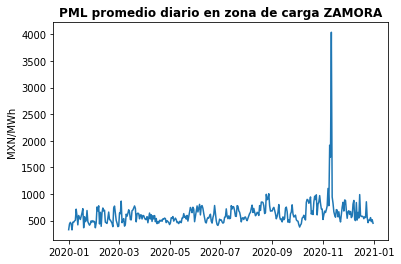

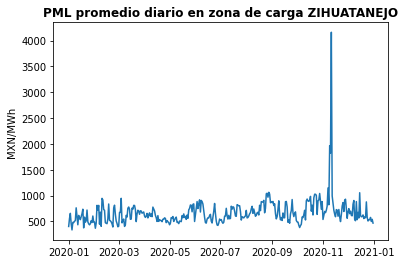

In [ ]:
#inicia for loop
for i in range(len(Zonas)):
  plot_data = PML_diario[PML_diario['Zona']==Zonas[i]]
  #Se grafica plot_data
  plt.plot(plot_data['Fecha'],plot_data['PML'])
  #Etiqueta eje y
  plt.ylabel('MXN/MWh', fontsize = 10) 
  #Titulo
  plt.title('PML promedio diario en zona de carga ' + Zonas[i], fontsize = 12, weight = 'bold')
  #Para mostrar la gráfica  
  plt.show()


In [ ]:
# Para entender el rolling con mean
rolling_PML = PML_diario[PML_diario['Zona']=='ACAPULCO']['PML'].rolling(window=15).mean()
PML_con_rolling = PML_diario[PML_diario['Zona']=='ACAPULCO']
PML_con_rolling['PML prom_mov']=rolling_PML
PML_con_rolling.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Fecha      Zona         PML  PML prom_mov
0    2020-01-01  ACAPULCO  436.570833           NaN
101  2020-01-02  ACAPULCO  610.293750           NaN
202  2020-01-03  ACAPULCO  735.700833           NaN
303  2020-01-04  ACAPULCO  472.028750           NaN
404  2020-01-05  ACAPULCO  347.766250           NaN
505  2020-01-06  ACAPULCO  498.838750           NaN
606  2020-01-07  ACAPULCO  493.572917           NaN
707  2020-01-08  ACAPULCO  519.949167           NaN
808  2020-01-09  ACAPULCO  535.622083           NaN
909  2020-01-10  ACAPULCO  801.645833           NaN
1010 2020-01-11  ACAPULCO  629.708333           NaN
1111 2020-01-12  ACAPULCO  448.825000           NaN
1212 2020-01-13  ACAPULCO  639.871250           NaN
1313 2020-01-14  ACAPULCO  587.703333           NaN
1414 2020-01-15  ACAPULCO  552.927083    554.068278
1515 2020-01-16  ACAPULCO  615.694167    566.009833
1616 2020-01-17  ACAPULCO  677.884167    570.515861
1717 2020-01-18  ACAPULCO  770.345833    572.825528
1818 2020-01-19  ACAPULCO  390.295000    567.376611
1919 2020-01-20  ACAPULCO  606.739167    584.641472
2020 2020-01-21  ACAPULCO  502.805000    584.905889
2121 2020-01-22  ACAPULCO  535.198333    587.680917
2222 2020-01-23  ACAPULCO  752.260000    603.168306
2323 2020-01-24  ACAPULCO  510.476250    601.491917
2424 2020-01-25  ACAPULCO  473.053333    579.585750
2525 2020-01-26  ACAPULCO  454.731667    567.920639
2626 2020-01-27  ACAPULCO  475.940000    569.728306
2727 2020-01-28  ACAPULCO  538.298333    562.956778
2828 2020-01-29  ACAPULCO  498.763750    557.027472
2929 2020-01-30  ACAPULCO  674.192083    565.111806

Es exactamente el mismo código, solo que se añadió en la segunda línea del for loop un procedimiento para calcular el promedio móvil con una ventana/window = 15. Esto significa que, para el 16 de enero tomara como valor el promedio dado entre los 15 días anteriores. Esto provocará que se pierdan los primeros 15 valores de PML. Pero esto nos permite eliminar el ruido de la gráfica anterior, creando un efecto que hace la curva más suave

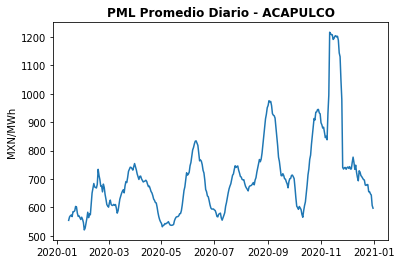

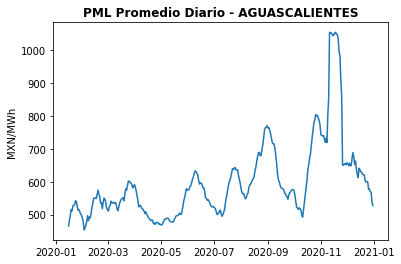

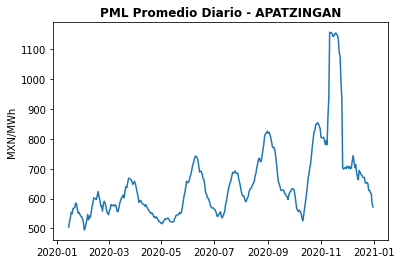

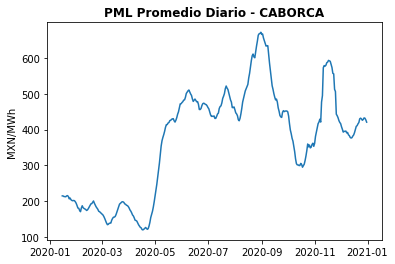

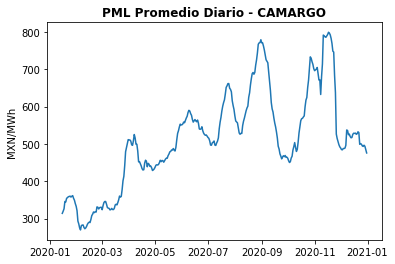

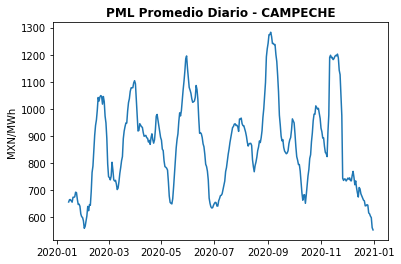

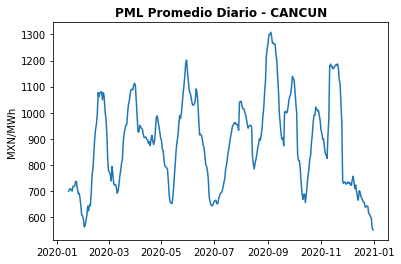

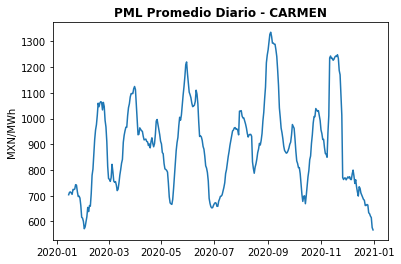

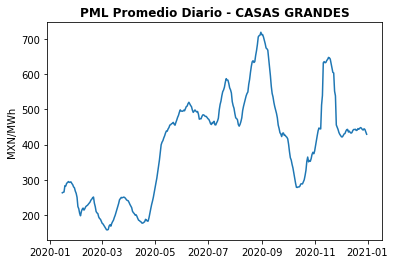

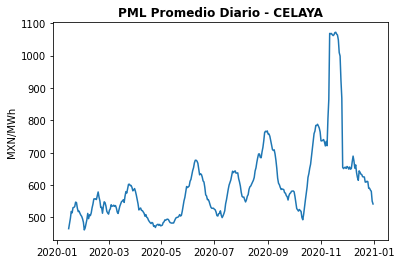

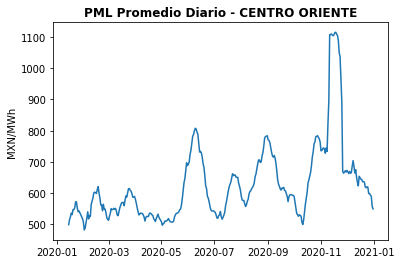

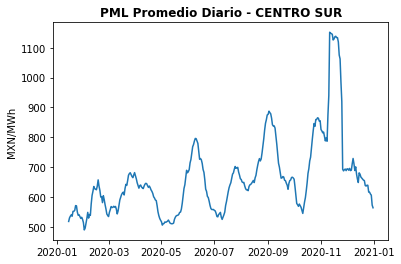

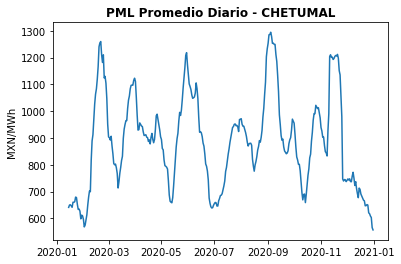

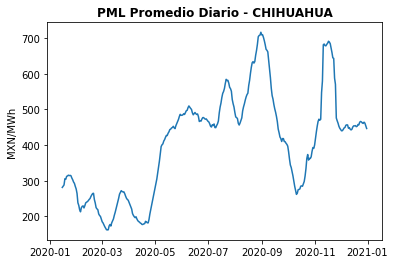

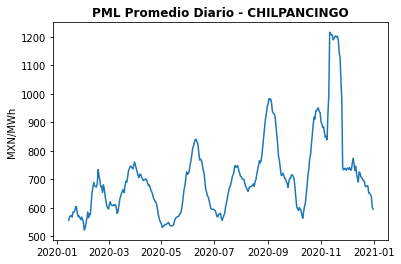

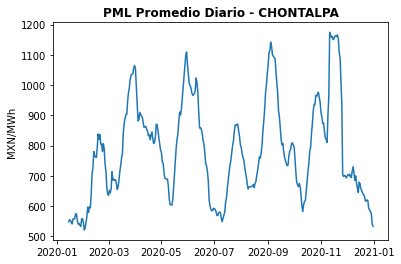

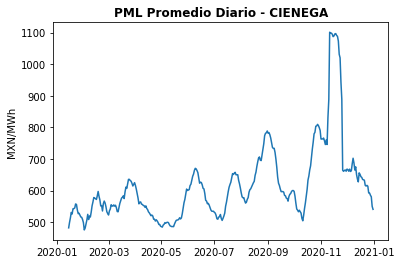

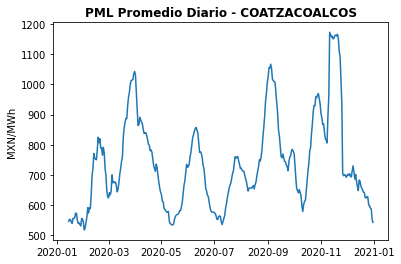

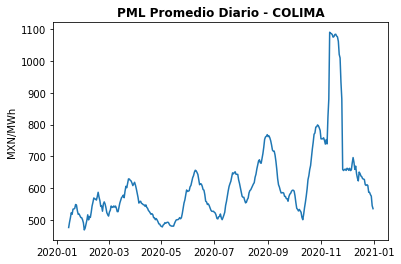

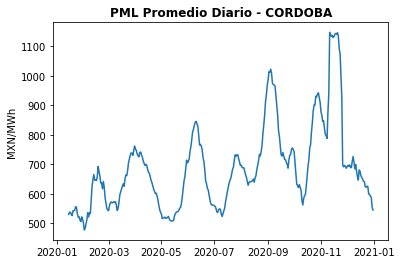

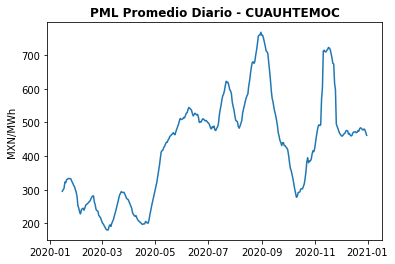

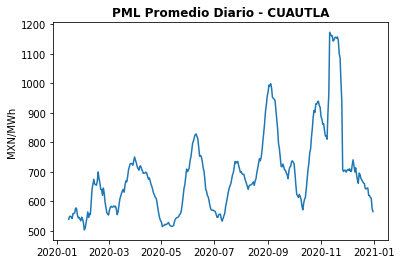

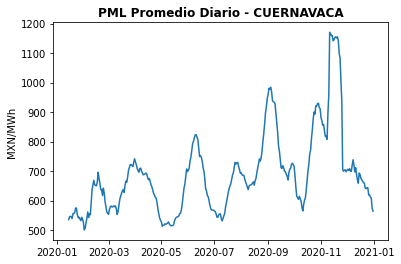

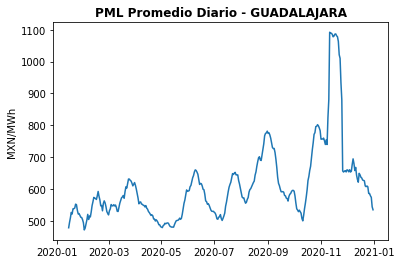

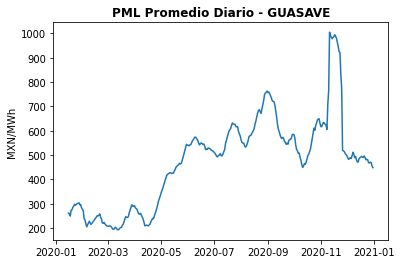

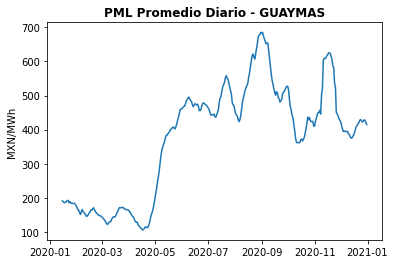

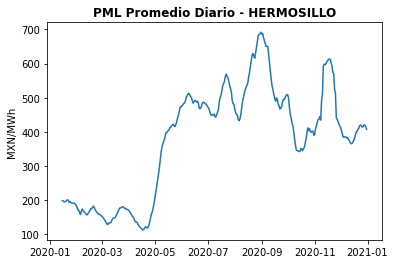

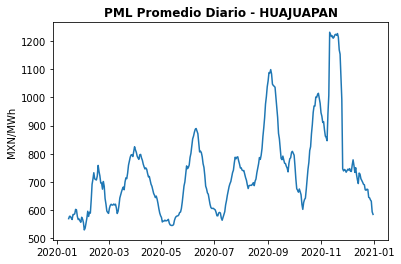

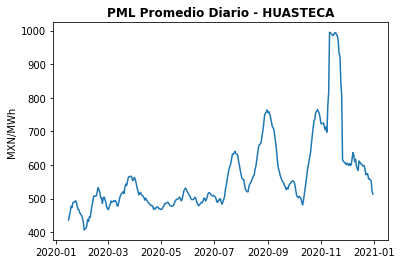

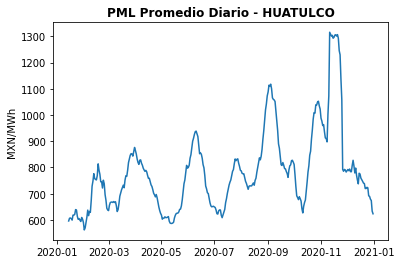

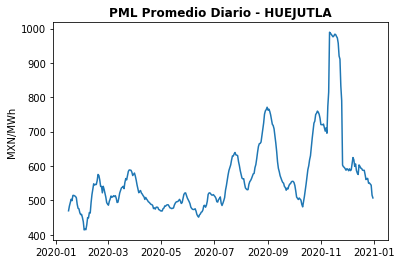

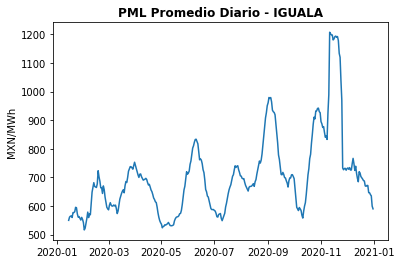

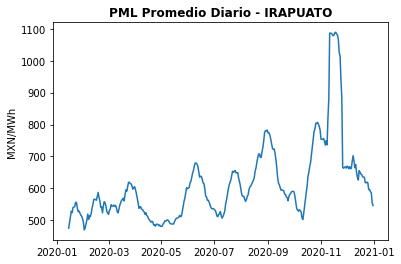

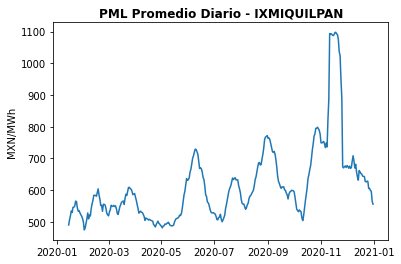

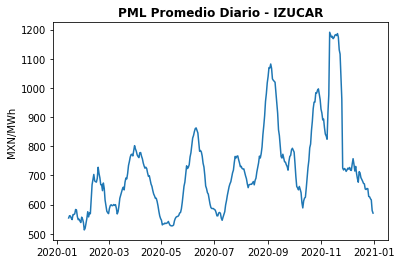

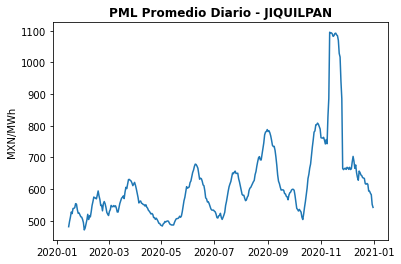

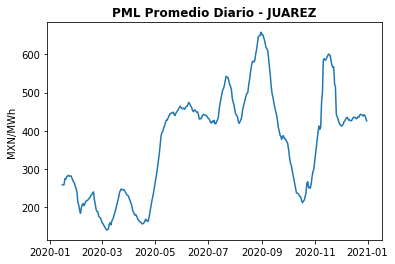

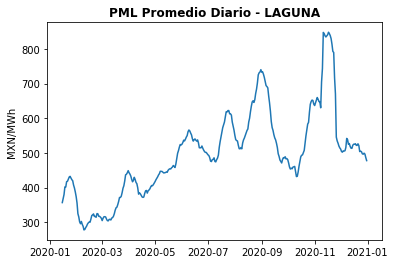

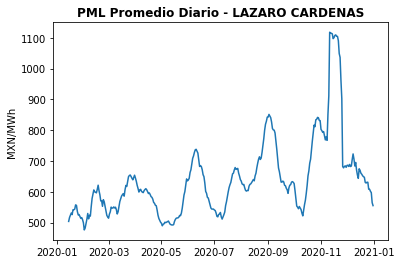

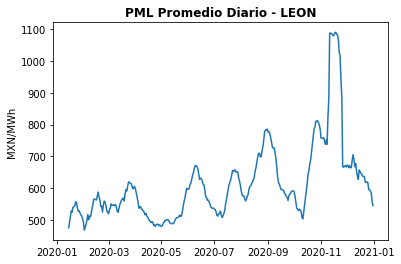

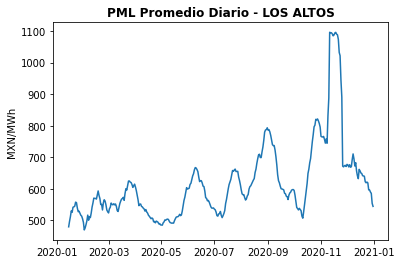

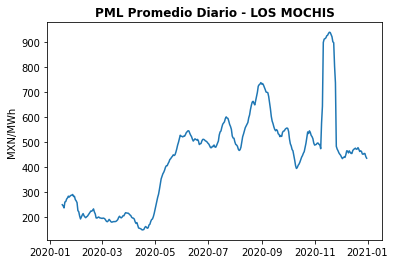

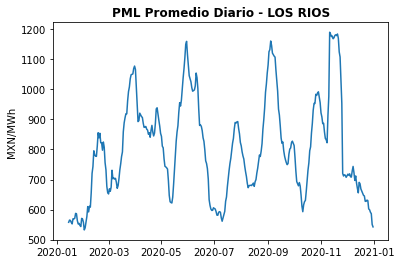

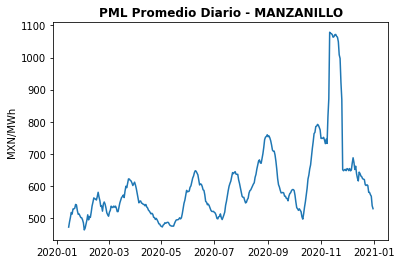

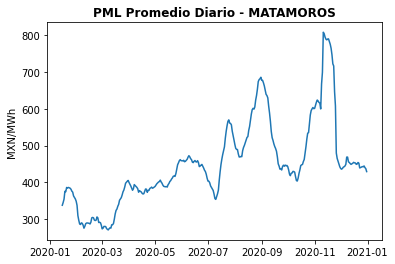

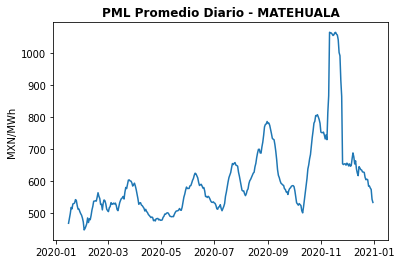

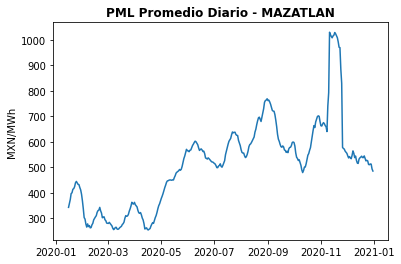

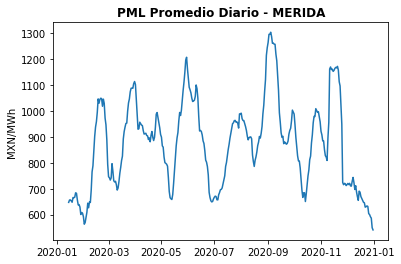

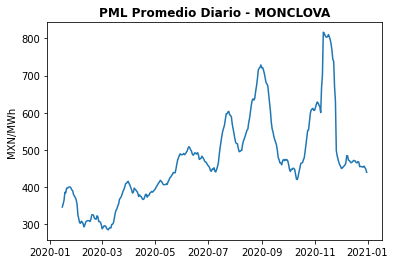

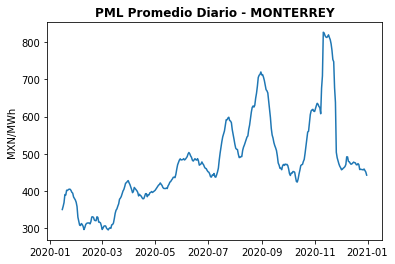

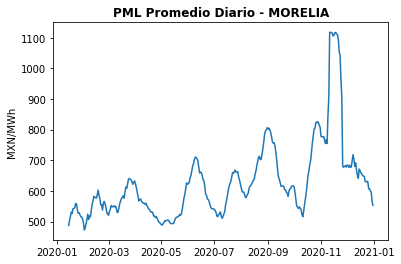

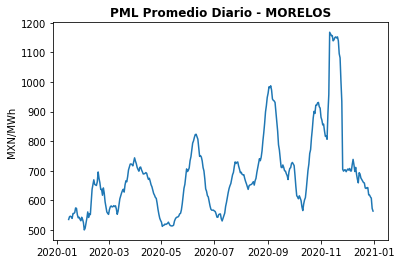

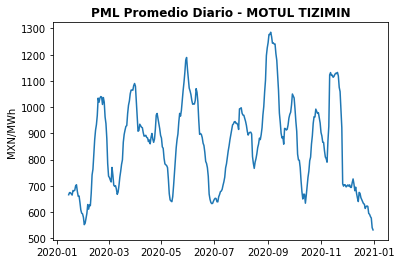

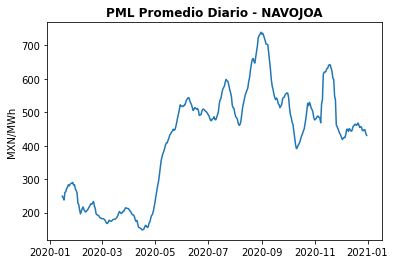

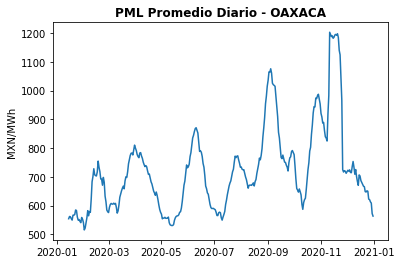

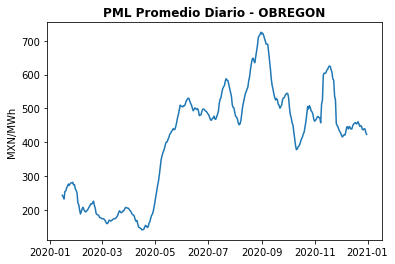

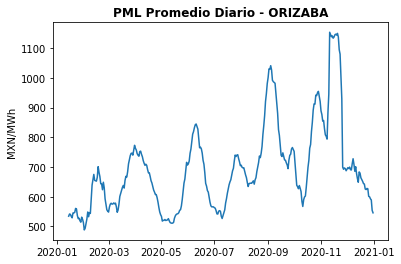

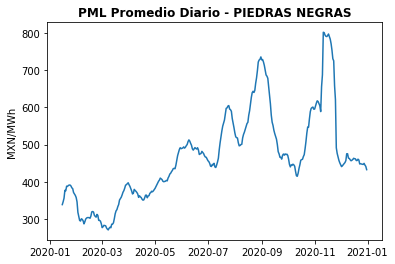

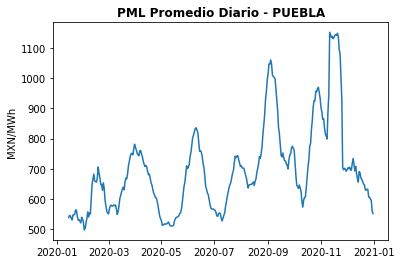

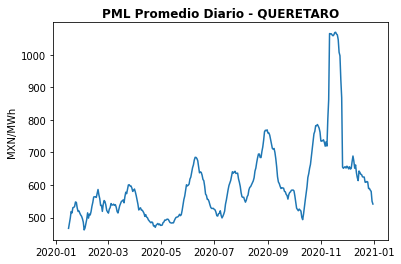

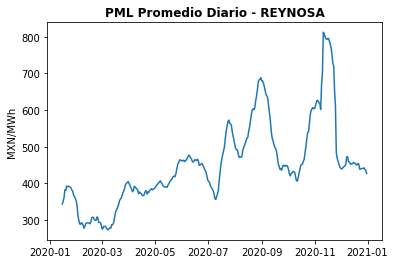

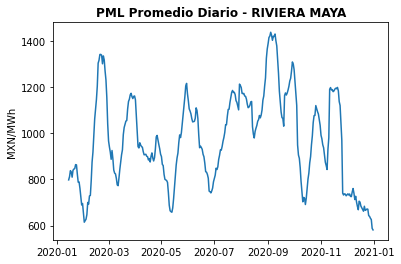

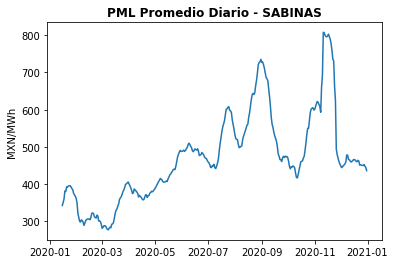

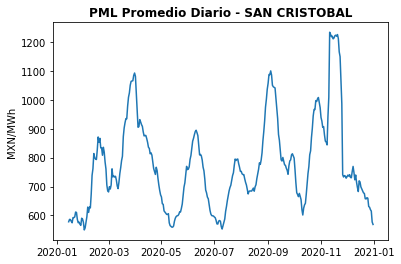

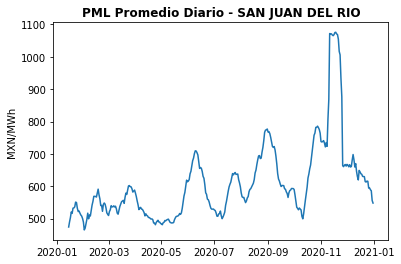

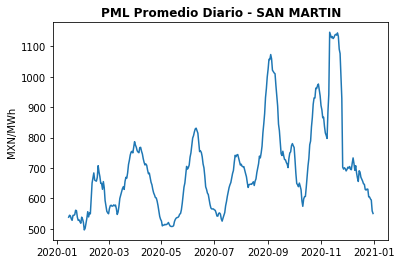

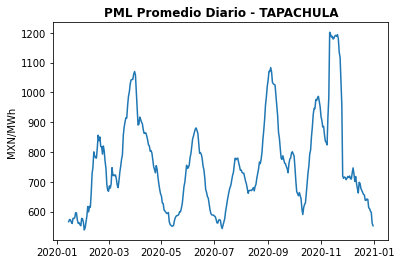

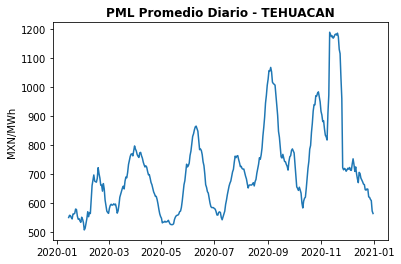

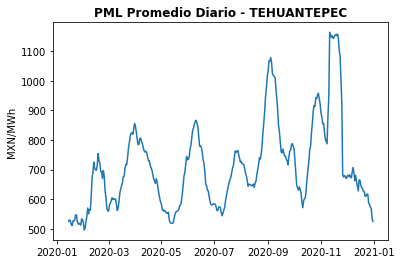

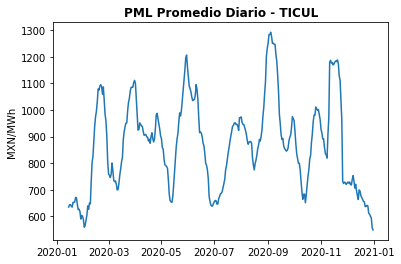

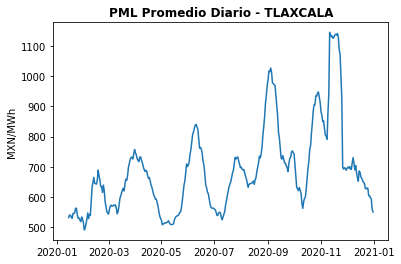

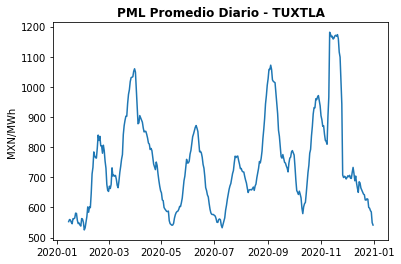

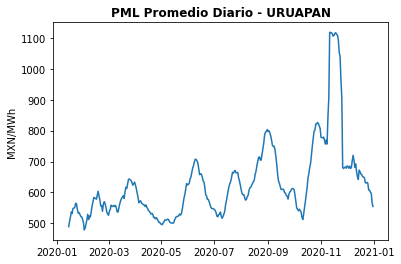

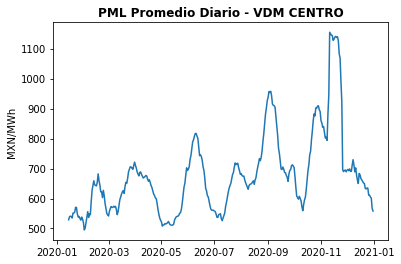

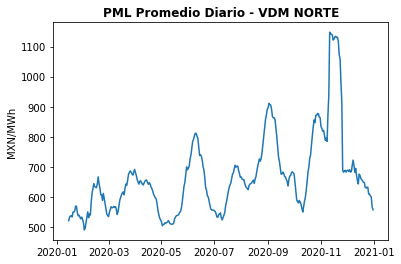

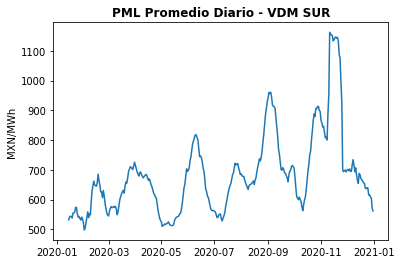

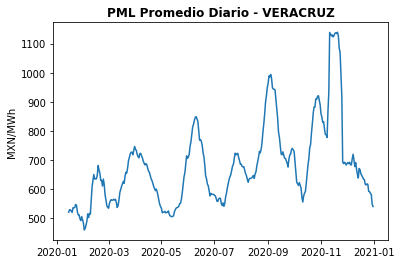

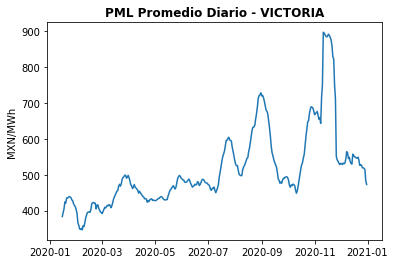

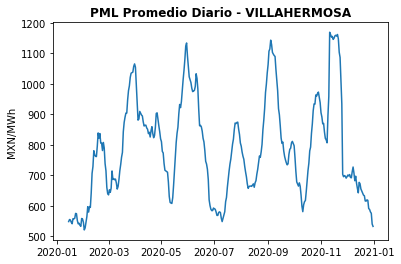

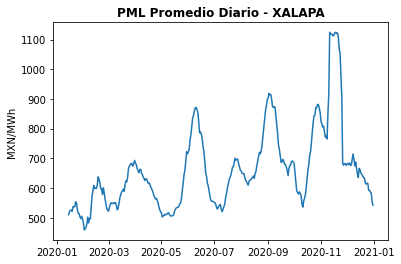

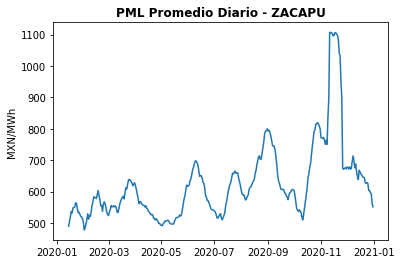

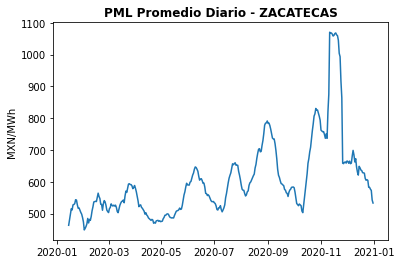

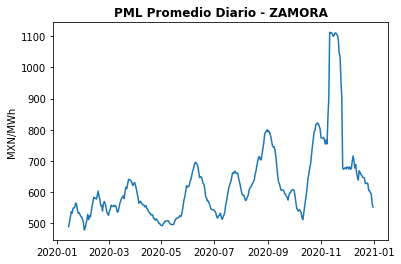

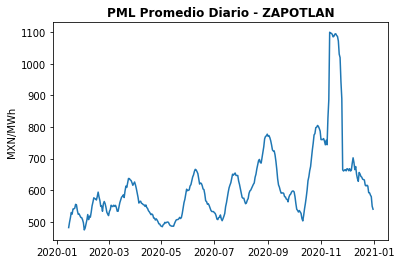

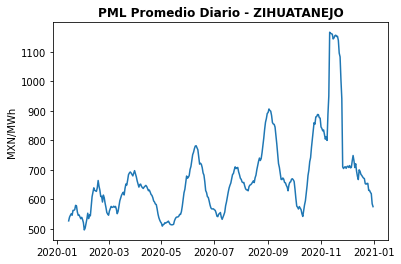

In [ ]:
for i in range(len(Zonas)):
  plot_data = PML_diario.loc[PML_diario['Zona'] == Zonas[i]][['Fecha','PML']]
  plot_data['PML'] = plot_data['PML'].rolling(window=15).mean()
  plt.plot(plot_data['Fecha'],plot_data['PML'])
  plt.ylabel('MXN/MWh', fontsize = 10)
  plt.title('PML Promedio Diario' + ' - ' + Zonas[i]  , fontsize = 12, weight = 'bold')    
  plt.show() 

Ahora quiero visualizar la distribución de PML para cada zona de carga, ```plt.hist()``` será la función que nos ayude a crear nuestro histograma, a la cual solo debemos proveerle como argumento una sola columna, en este caso los PML. El argumento ```bins``` indica en cuantos rangos/casillas quiero dividir mi conjunto de valores  (varie este valor para observar). El argumento ```range``` fue algo opcional que agregué para que la gráfica solo muestre valores de aquellos PML que estuvieron por debajo de 2000 (Quite este argumento para obesrvar su efecto)

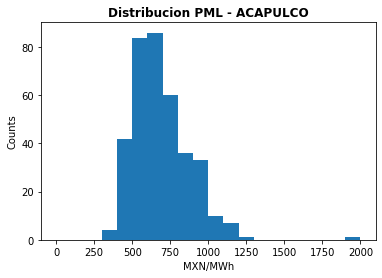

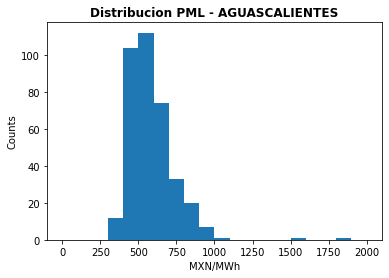

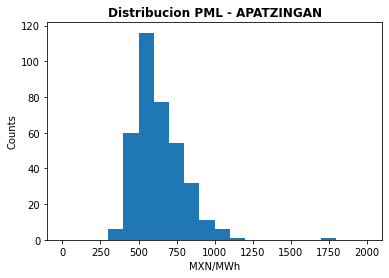

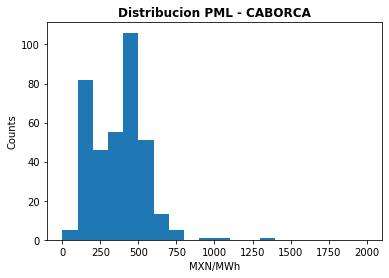

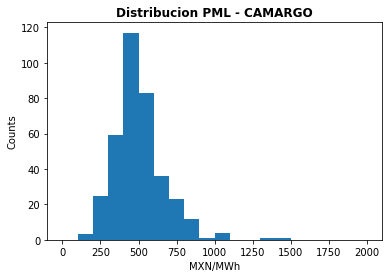

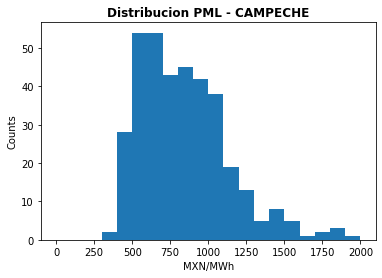

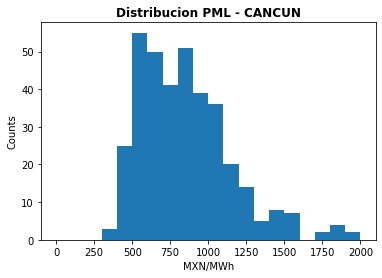

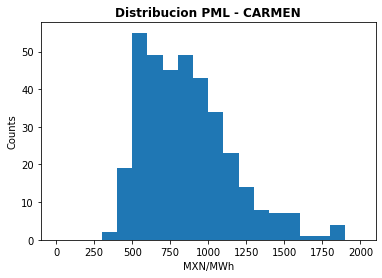

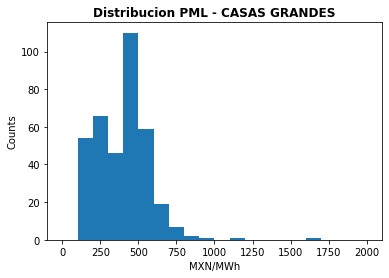

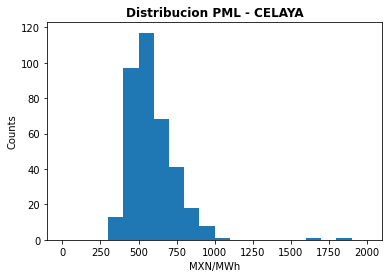

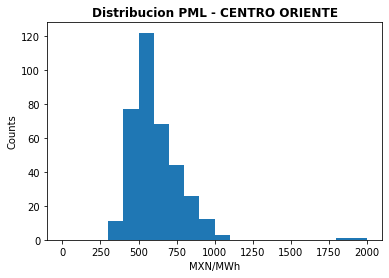

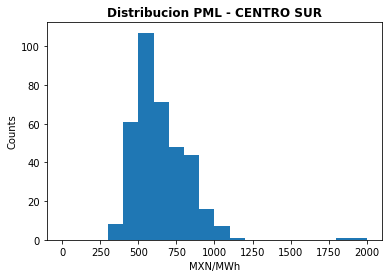

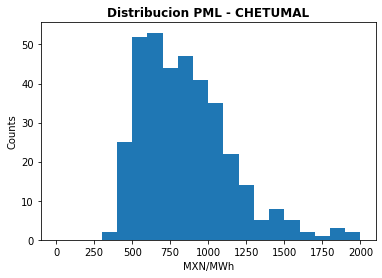

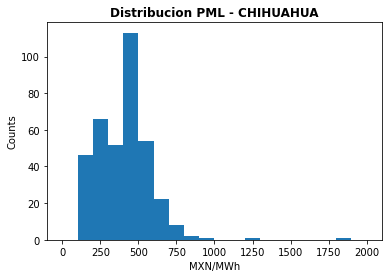

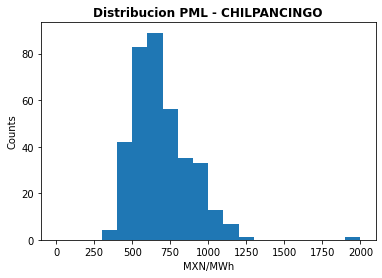

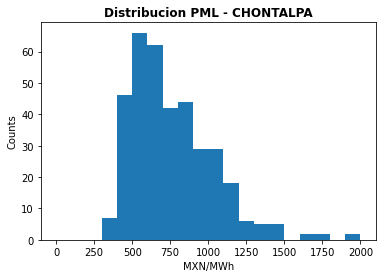

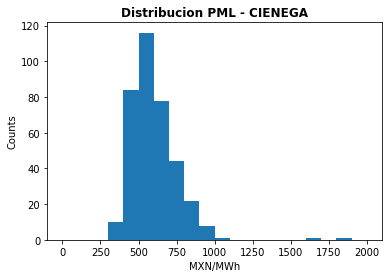

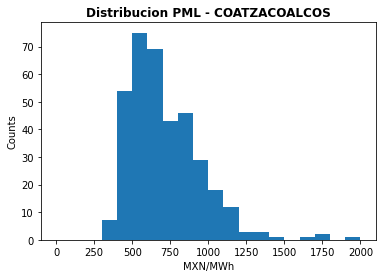

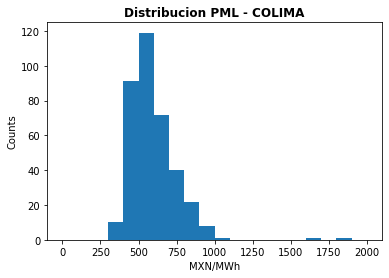

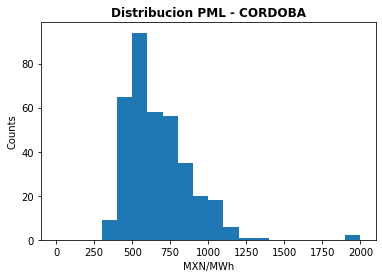

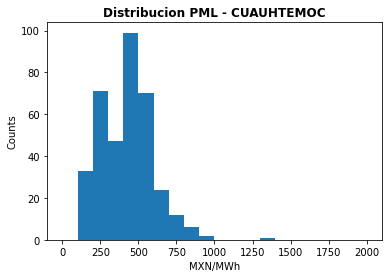

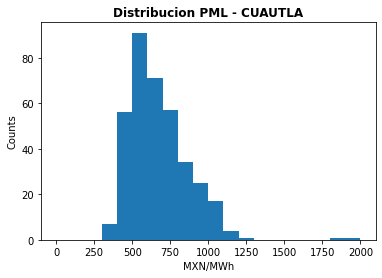

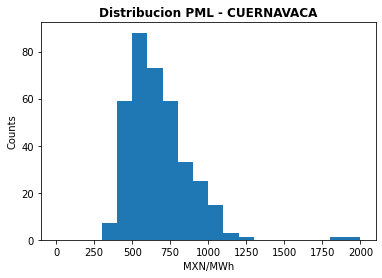

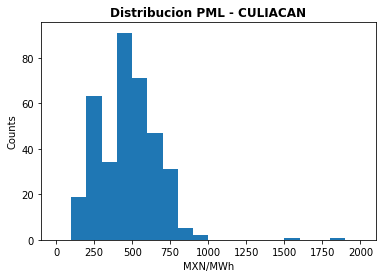

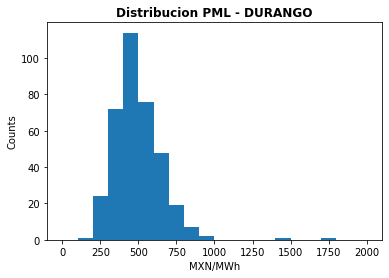

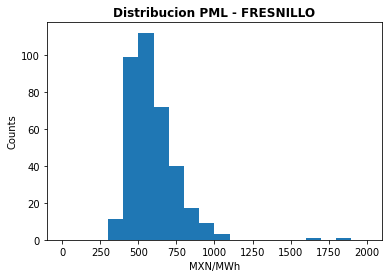

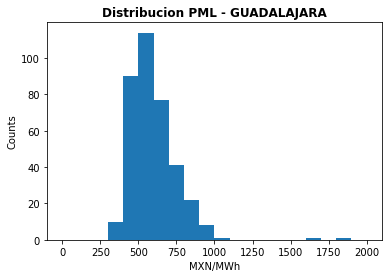

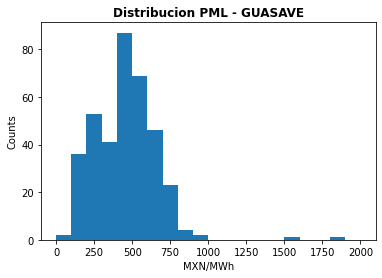

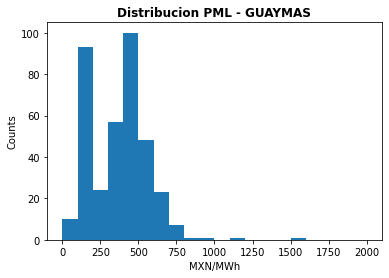

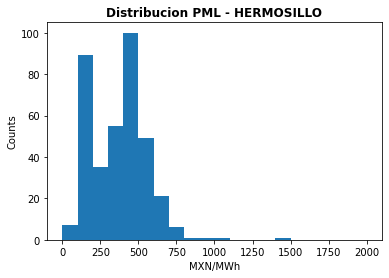

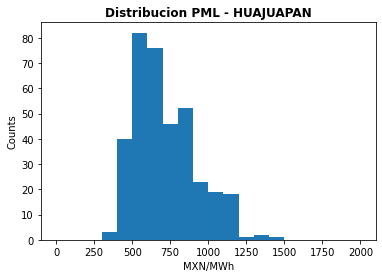

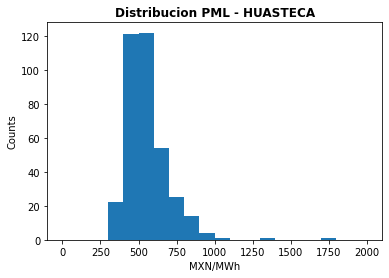

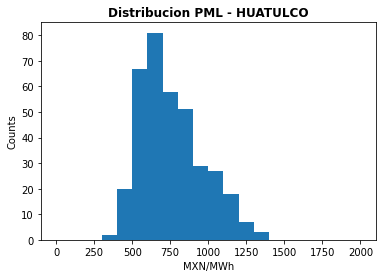

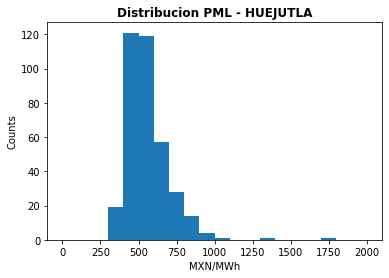

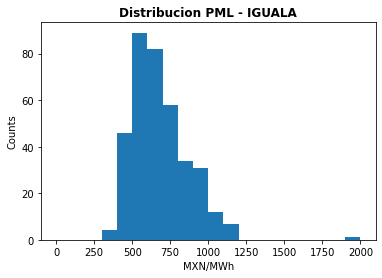

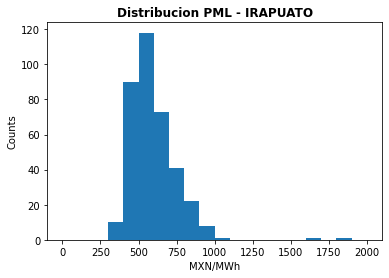

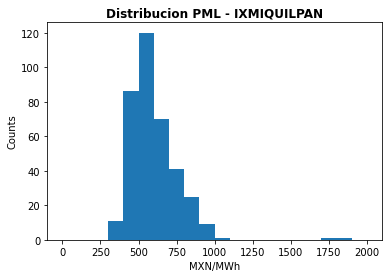

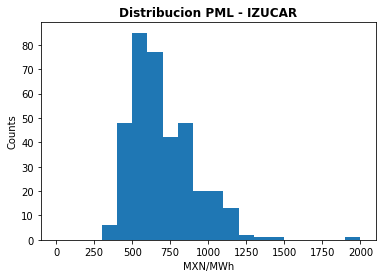

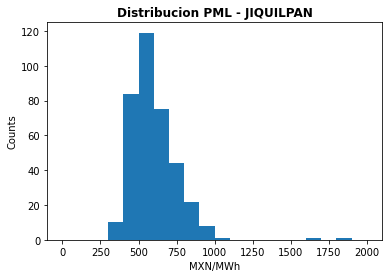

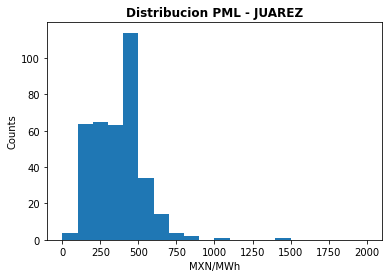

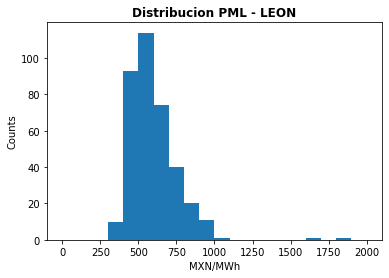

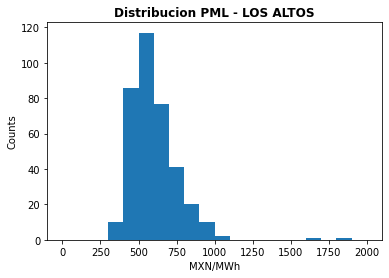

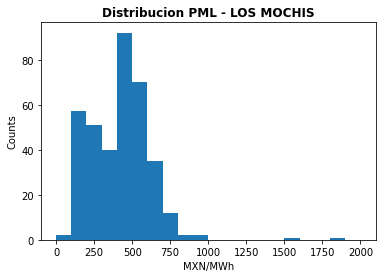

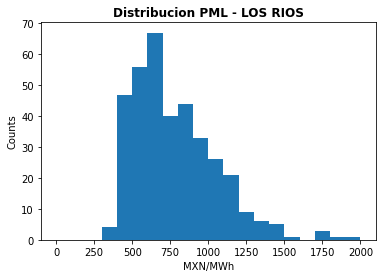

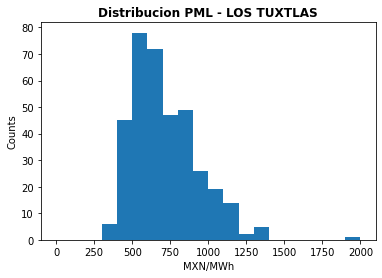

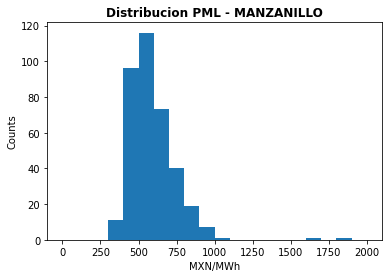

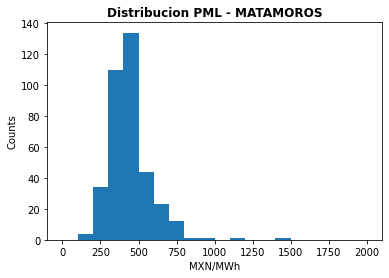

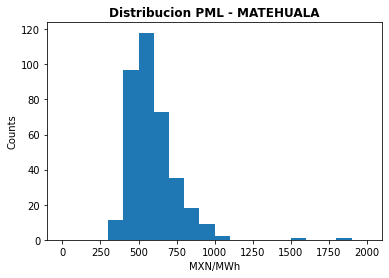

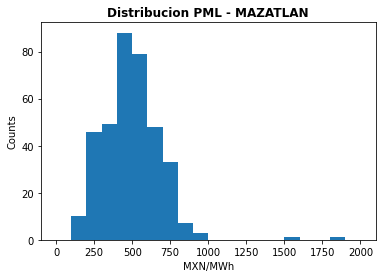

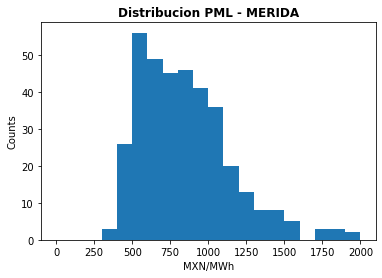

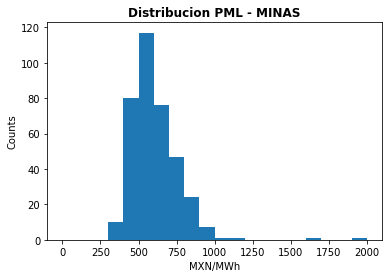

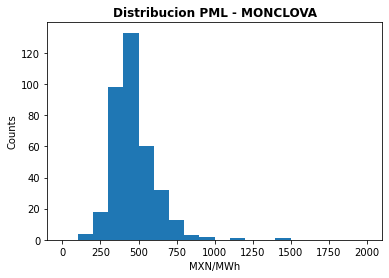

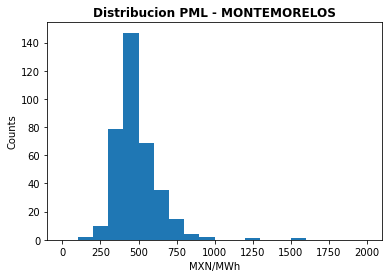

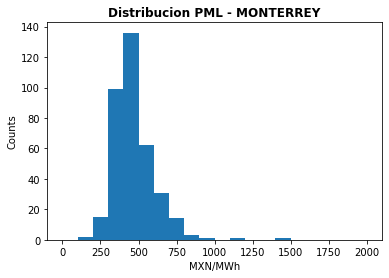

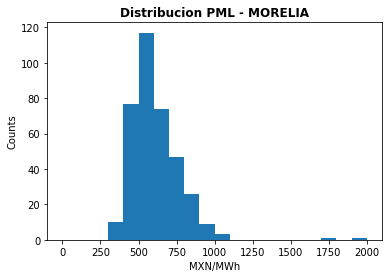

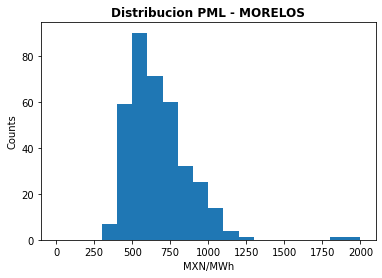

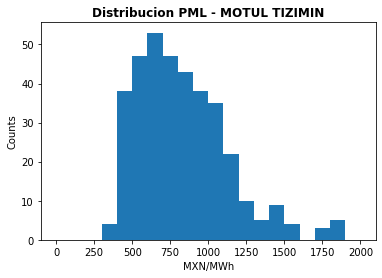

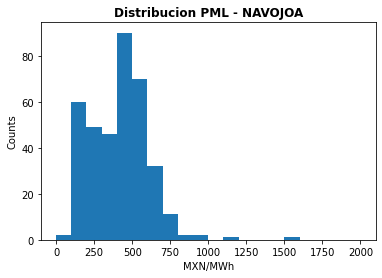

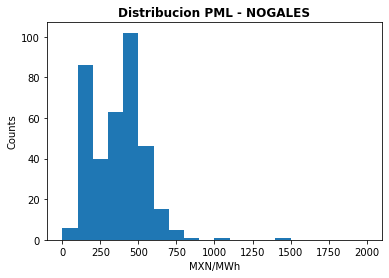

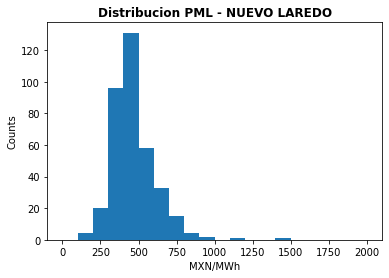

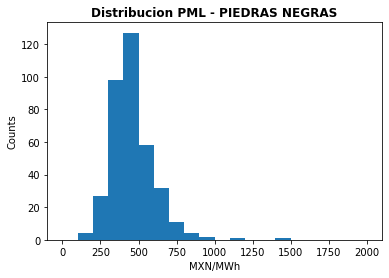

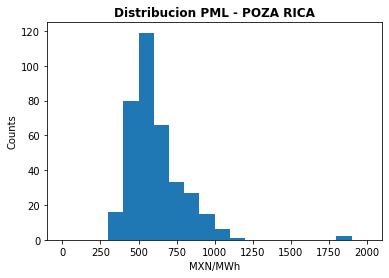

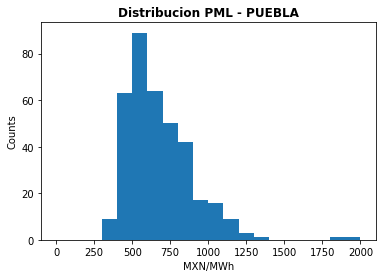

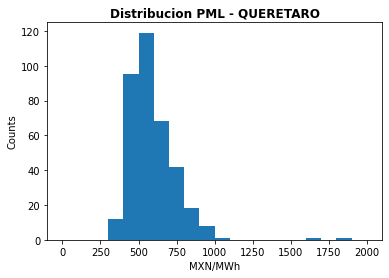

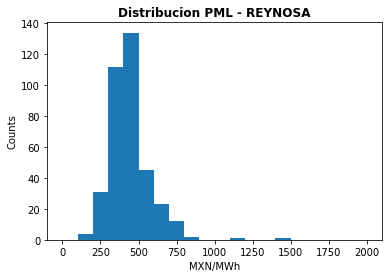

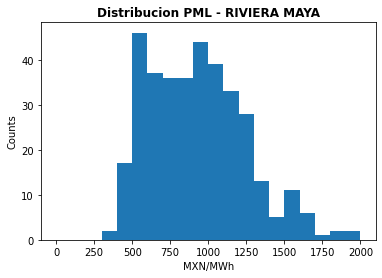

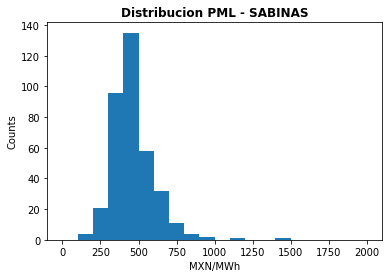

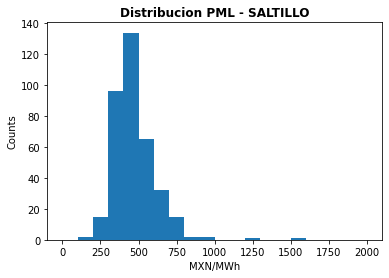

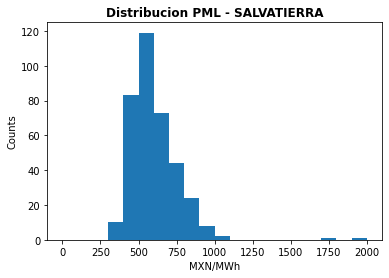

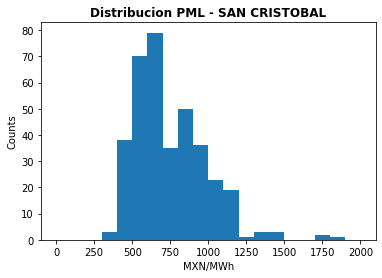

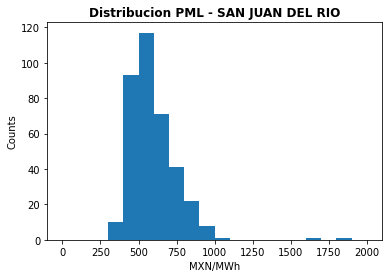

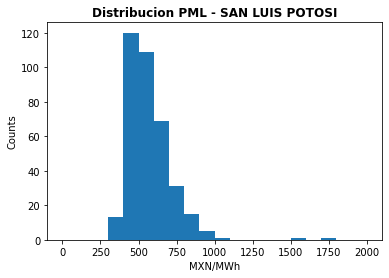

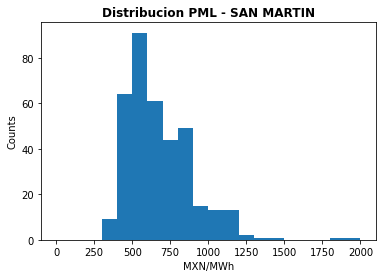

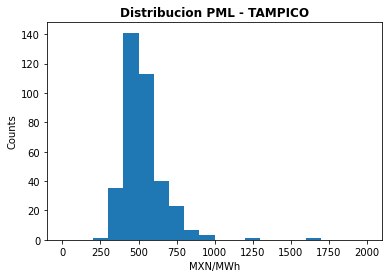

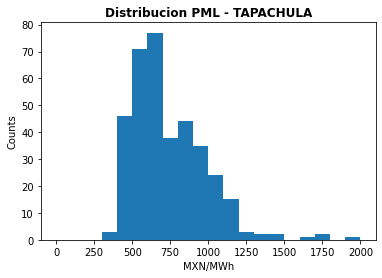

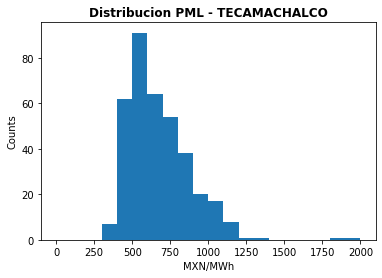

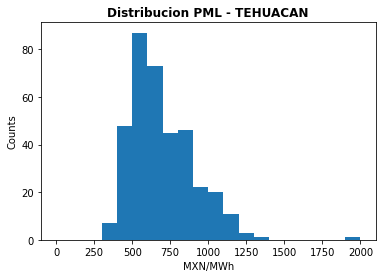

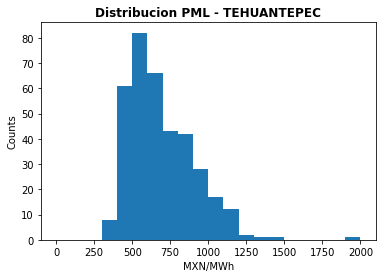

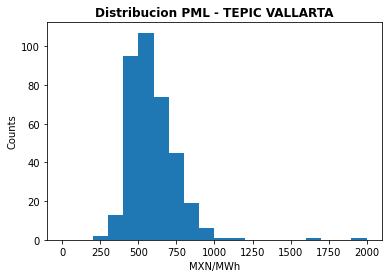

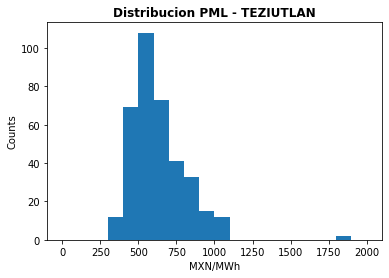

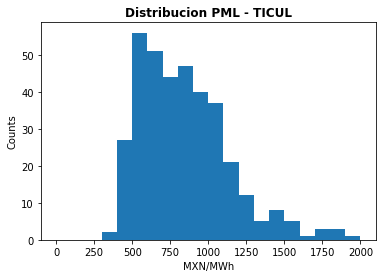

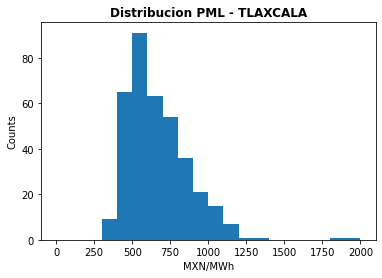

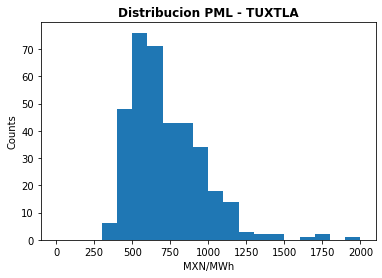

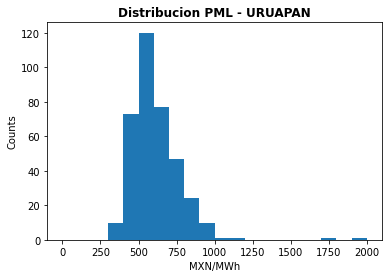

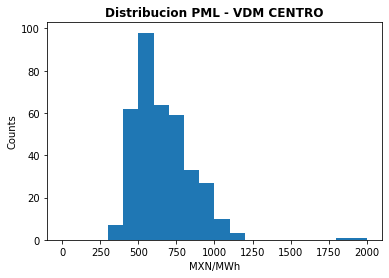

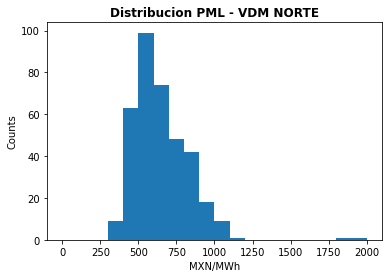

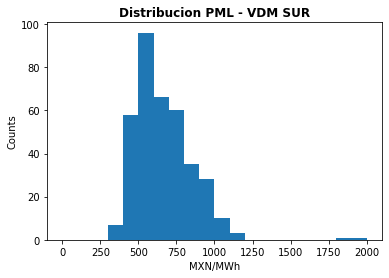

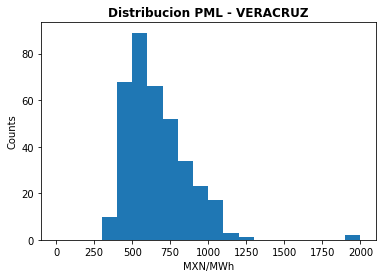

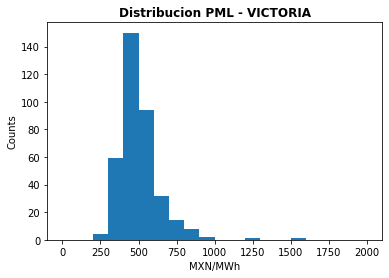

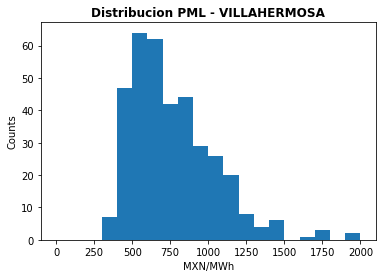

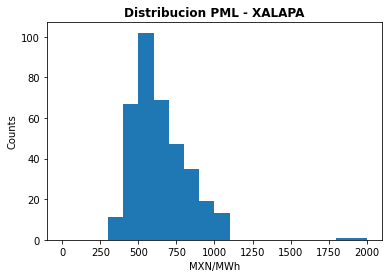

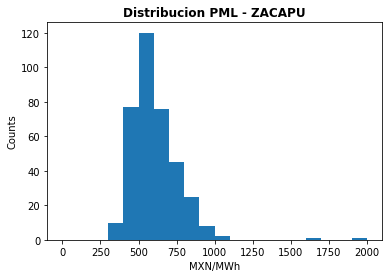

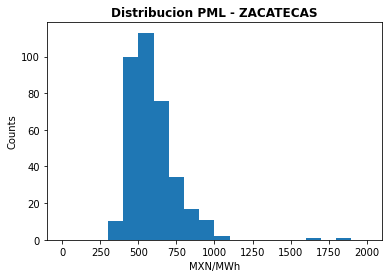

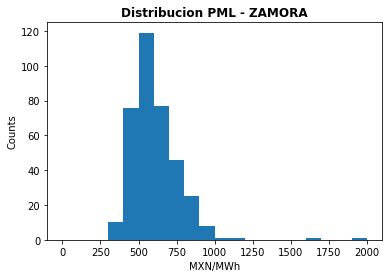

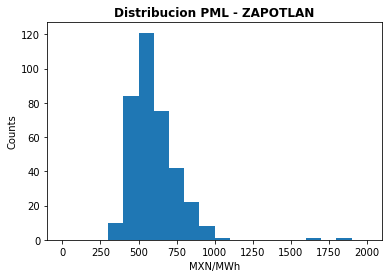

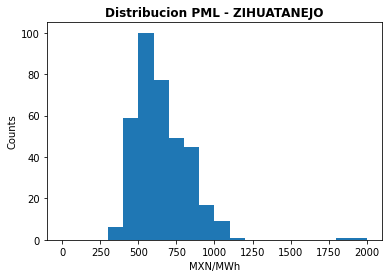

In [ ]:
for i in range(len(Zonas)):    
    plot_data = PML_diario.loc[(PML_diario['Zona'] == Zonas[i])][['PML']]    
    plt.hist(plot_data['PML'],bins=20,range=(0,2000)) 
    plt.xlabel('MXN/MWh', fontsize = 10)
    plt.ylabel('Counts', fontsize = 10)
    plt.title('Distribucion PML' + ' - ' + Zonas[i]  , fontsize = 12, weight = 'bold')    
    plt.show()

Quiero obtener un dataframe similar a ```PML_diario```, solo que quiero obtener el promedio del componente de congestión. Exportaré este dataframe y el dataframe que contiene el promedio de los PML, ya que serán usados en para el siguiente ejercicio.

In [ ]:
cong_diario = BD_PML.groupby(['Fecha','Zona'])['Comp_cong'].mean().reset_index()
cong_diario

Fecha            Zona  Comp_cong
0     2020-01-01        ACAPULCO  92.955417
1     2020-01-01  AGUASCALIENTES  14.787500
2     2020-01-01      APATZINGAN  23.129167
3     2020-01-01         CABORCA -21.725000
4     2020-01-01         CAMARGO  15.704167
...          ...             ...        ...
36961 2020-12-31          ZACAPU   1.054583
36962 2020-12-31       ZACATECAS   3.762917
36963 2020-12-31          ZAMORA   1.126250
36964 2020-12-31        ZAPOTLAN   0.792083
36965 2020-12-31     ZIHUATANEJO  -0.358750

[36966 rows x 3 columns]

Subimos un nivel entre directorios

In [ ]:
os.chdir('..') 

In [ ]:
#exportamos dataframes como archivos excel

cong_diario.to_excel('congzona.xlsx',index=False)
PML_diario.to_excel('pmlzona.xlsx',index=False)